# **3. PyTorch Computer Vision**



![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## Where does computer vision get used?

If you use a smartphone, you've already used computer vision.

Camera and photo apps use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.

Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

Security cameras use computer vision to detect potential intruders.

In essence, anything that can described in a visual sense can be a potential computer vision problem.

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **4. Making predictions and evaluting model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


![Computer Vision Input and Output Shapes](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
)


## **What is a (CNN) ?**

| Term | Description |
|------|-------------|
| CNN  | **Convolutional Neural Network (CNN)**. A type of deep learning model particularly suited for image data. CNNs are composed of multiple layers that automatically and adaptively learn spatial hierarchies of features from low-level edges to high-level details. They are primarily used in tasks like image classification, object detection, and facial recognition. CNN architecture typically includes: <br><br> - **Convolutional Layers**: Apply filters to detect features such as edges, textures, and patterns by convolving (sliding) across the input image.<br> - **Pooling Layers**: Reduce the spatial dimensions of the feature maps to lower computation, often using max pooling to retain the most prominent features.<br> - **Fully Connected Layers**: Connect neurons from one layer to another in a dense fashion, helping classify the features learned in previous layers.<br> - **Activation Functions**: Introduce non-linearities (e.g., ReLU) to enable complex mappings between inputs and outputs.<br><br> CNNs are distinguished from other neural networks by their use of convolutional layers, which allow them to retain spatial information and recognize patterns regardless of position within an image. |


---


| Layer Type                     | Purpose & Function                                                                                                                                                                                                                   |
|--------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Input Layer**                | Receives the raw pixel values of the input image, typically in 3D format (width, height, channels like RGB).                                                                                                                        |
| **Convolutional Layer**        | Applies multiple filters (kernels) to detect local patterns such as edges, textures, and shapes. Each filter creates a feature map that enhances important features and reduces irrelevant data.                                    |
| **Non-linear Activation Layer** (e.g., **ReLU**) | Introduces non-linearity to the network, enabling it to learn complex relationships. ReLU (Rectified Linear Unit) is the most common choice, transforming negative values to zero, which helps to avoid the vanishing gradient problem.                |
| **Hidden Convolutional Layers** | Deeper layers that apply additional convolutions, learning more abstract features as depth increases. Each hidden layer learns increasingly complex representations, from simple edges to high-level shapes and textures.       |
| **Pooling Layer** (e.g., **Max Pooling**) | Reduces the spatial dimensions (width, height) of feature maps, lowering computational requirements and highlighting dominant features. Max pooling, often with a 2x2 filter, captures the strongest feature in each region. |
| **Fully Connected (Dense) Layer** | Combines all neurons from previous layers, enabling the network to learn global patterns across the whole image. These dense layers are typically used near the end of the network to perform final classification or regression. |
| **Additional Non-linear Activation** (e.g., **ReLU or Sigmoid**) | Often placed after dense layers to add non-linearity. ReLU is common, but sigmoid or tanh may be used in specific cases, such as binary classification tasks.                                        |
| **Output Layer**               | Produces the final predictions. In classification tasks, this layer typically uses softmax for multi-class classification or sigmoid for binary classification, converting network outputs into probabilities.                          |


In [ ]:
# import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # for transformation and augementation


# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


The `ToTensor` transform from `torchvision.transforms` is used to convert image data into a format suitable for PyTorch models. Here’s what `ToTensor` does:

1. **Convert Image to Tensor**: `ToTensor` converts a PIL Image or a NumPy `ndarray` (like an image in pixel format) into a PyTorch tensor. PyTorch models expect inputs to be in tensor format, not in the standard image or array formats.

2. **Normalize Pixel Values**: `ToTensor` scales pixel values from the usual 0–255 range (typical for images) down to a range of 0–1 by dividing each pixel value by 255. This normalization helps with faster training and improves gradient stability during deep learning.

### Example Usage

In a typical data preprocessing pipeline, `ToTensor` is often combined with other transforms.


[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
train_data = torchvision.datasets.FashionMNIST(
    root="data", # dowload location
    train=True,
    download=True,
    transform=ToTensor(),  # images come as PIL format, we want to turn into Torch tensors
    target_transform=None
)
test_data= torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### **1.1 input and output shapes of a computer vision model**

In [ ]:
image.shape

torch.Size([1, 28, 28])

`[color_channels=1, height=28, width=28]`
> having color_channels=1 means that the image is grayscale

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

via `.classes` attribute we get no of classes

In [ ]:
classes_names= train_data.classes
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

we have 10 classes so we will work with `multi-class classification`

### **1.2 visiual our data**

In [ ]:
image.ndim

3

Image shape: torch.Size([1, 28, 28])


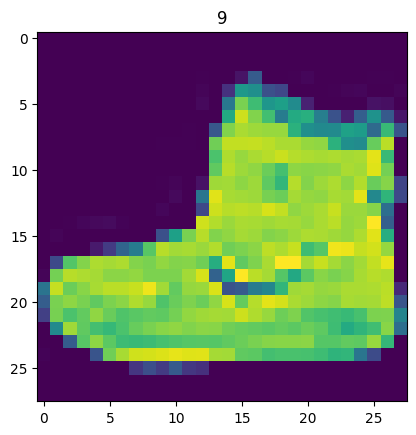

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

we can turn the image into grayscal using `cmap` parameter of `plt.imshow()`

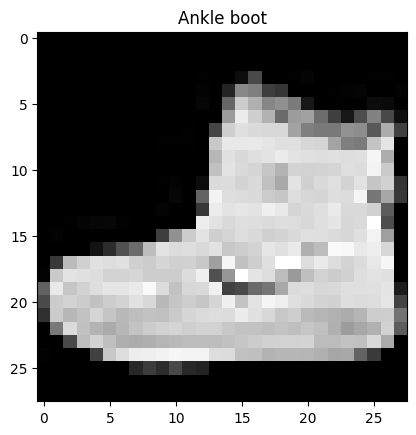

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes_names[label]);


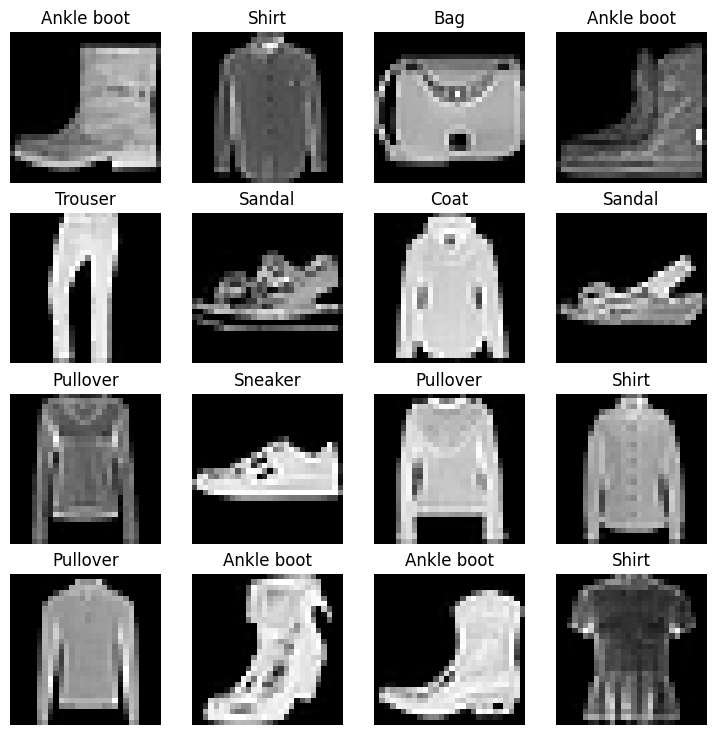

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols +1):
  ranadom_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label =  train_data[ranadom_idx]
  fig.add_subplot(rows, cols, i) # contain rows*cols
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(classes_names[label])
  plt.axis(False);


> **Question:** Do you think the above data can be model with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?

## **2. Prepare DataLoader**

To prepare data, use a [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), or simply `DataLoader`. This tool loads data efficiently by breaking a large `Dataset` into smaller, manageable chunks called **batches** (or **mini-batches**), controlled by the `batch_size` parameter. Batching allows the model to process data in parts, making computation easier and faster, especially with large datasets, and enables more frequent gradient updates per epoch.

A good starting batch size is often [32](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw), though it varies by problem. Common values are powers of 2 (e.g., 32, 64, 128, 256, 512).

![An example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Now, let's create `DataLoader`s for our training and test sets.


In [ ]:
from torch.utils.data import DataLoader
# setup batch size as hyperparameter
BATCH_SIZE = 32
# turn your data to be iterable as dataframe in pandas
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle= True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle= False)
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7eae8a8f0760>, <torch.utils.data.dataloader.DataLoader object at 0x7eae8772c8b0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_label_batch.shape)
print(train_features_batch.ndim, train_label_batch.ndim)

torch.Size([32, 1, 28, 28]) torch.Size([32])
4 1


Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


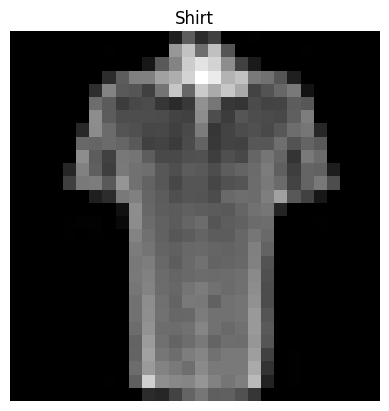

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## **3. Model_0: building a baseline model**


Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

We've done this in a previous section but there's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

`nn.Flatten` is a layer in PyTorch's `torch.nn` module that reshapes the input tensor by flattening all dimensions except the batch dimension. This is often used to prepare data from convolutional layers for fully connected layers in a neural network.

> Purpose of `nn.Flatten`
In Convolutional Neural Networks (CNNs), convolutional and pooling layers produce multi-dimensional outputs (e.g., `[batch_size, channels, height, width]`). However, fully connected layers (dense layers) expect inputs to be in a 1D format, such as `[batch_size, features]`. `nn.Flatten` simplifies this by reshaping the output of the previous layers into a flat vector.


In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

X= train_features_batch[0]
output = flatten_model(X)

print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


> Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

In [ ]:
from torch import nn
class FashionMNISTMODELV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTMODELV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(classes_names))
model_0.to("cpu")

FashionMNISTMODELV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### **3.1 setup loss, optimizer and evaluation metrics**
> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).


[`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Downloaded, skipping download")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


Downloaded, skipping download


In [ ]:
print("it has been downloaded why still waiting it hhhhhh i joke with you when be printed ...")

it has been downloaded why still waiting it hhhhhh i joke with you when be printed ...


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### **3.2 for fun**


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

#### **3.3 train and test loop**


Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs  = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred= model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)


  ## testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu, end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 47.667 seconds


### **4. Make predictions and get result model_0**

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                          y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    """
 if you want a method inside a class to return a single scalar value instead of a tensor,
 you can use .item() to convert a one-element tensor to a Python number.
    """
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results= eval_model(model=model_0, data_loader=test_dataloader,
                            loss_fn = loss_fn, accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### **setup device agnostic-code**

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'


### **6. Model_1 enhanced model**

We learned about [the power of non-linearity in notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity).

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.


In [ ]:

class FashionMNISTMODELV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTMODELV1(input_shape= 784,
                              hidden_units=10,
                              output_shape=len(classes_names)
                              ).to(device)
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
"""
 using next() with model_1.parameters() to access the first parameter is a quick way to
 check the model's device without examining each parameter individually.
"""

"\n using next() with model_1.parameters() to access the first parameter is a quick way to \n check the model's device without examining each parameter individually.\n"

#### **6.1 setup loss, optimizer and evalution metices**


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


#### **6.2 Functionizing training and test loops**

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  train_loss,train_acc= 0,0
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    #1- forawar pass
    y_pred = model(X)
    #2- calculate loss
    loss = loss_fn(y_pred, y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    #3- optimizer zero grad
    optimizer.zero_grad()

    #4- loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # calculate loss and acc
  train_loss/= len(data_loader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.eval() # pur model in eval mode
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss+= loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
                              )
        # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----------------")
  train_step(data_loader= train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1= print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----------------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1 
----------------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2 
----------------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 41.483 seconds


> **Question:** "I used a a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
>
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is.

Let's evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [ ]:
torch.manual_seed(42)
# note this will error "eval_model()" not using device agnostic
model_1_result= eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_result

{'model_name': 'FashionMNISTMODELV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

Then we'll try calculating the results again.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Evaluates a given model on a given dataset.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
      device (str, optional): Target device to compute on. Defaults to device.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      y_pred = model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device=device
)
model_1_results


{'model_name': 'FashionMNISTMODELV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

From the looks of things, it seems like our model is **overfitting** on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:
1. Using a smaller or different model (some models fit certain kinds of data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

### **7. Model_2 building CNN**


It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

> What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [ ]:
class FashionMNISTMODELV2(nn.Module):
  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2=nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x
torch.manual_seed(42)
model_2 = FashionMNISTMODELV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(classes_names)).to(device)
model_2

FashionMNISTMODELV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### **7.1 stepping through `nn.Conv2d()`**

let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`.

# Convolutional Neural Networks (CNNs) in Computer Vision

### CNN Architecture Overview

| **Layer**                     | **Function**                                                                                                 | **Purpose**                                                                                            |
|-------------------------------|-------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Convolutional Layer**       | Applies filters to detect edges, shapes, or textures by convolving across the input image.                  | Extracts spatial features relevant for classification.                                                 |
| **Activation (ReLU)**         | Introduces non-linearity by setting negative values in the feature map to zero.                             | Helps model complex patterns and prevents issues like vanishing gradients.                              |
| **Pooling Layer**             | Downsamples the feature map, typically by keeping only the maximum value in each region (Max Pooling).      | Reduces the spatial size, maintaining essential features while reducing noise.                         |
| **Fully Connected Layer**     | Flattens the feature maps and connects them to a dense layer for final classification.                      | Integrates extracted features to make a final decision.                                                |
| **Softmax Layer**             | Converts the final output into probabilities for each class.                                                | Provides the final class prediction with confidence scores.                                            |

---

### Step-by-Step Process of CNN

#### 1. **Input Image**
The input image is fed into the CNN, usually resized to a standard dimension like \( 28 \times 28 \) or \( 224 \times 224 \) pixels for consistency across samples.

#### 2. **Convolutional Layer**
   - **Process**: The layer slides small filters (kernels) over the input image, performing an element-wise multiplication and summing results to create a feature map.
   - **Result**: A feature map that highlights specific features, such as edges or textures.
```plaintext
   | **Example**                |                                         |
   |----------------------------|-----------------------------------------|
   | **Input Image (5x5)**      | `[[1, 2, 0, 1, 0], [3, 1, 0, 2, 3], ...]` |
   | **3x3 Filter (Kernel)**    | `[[1, 0, -1], [1, 0, -1], [1, 0, -1]]` |
   | **Feature Map (3x3)**      | `[[4, -1, 3], [0, 1, 2], ...]`            |
```

#### 3. **Activation Layer (ReLU)**
   - **Process**: Applies the Rectified Linear Unit (ReLU) function to each element of the feature map, setting all negative values to zero.
   - **Result**: An activated feature map with only positive values, allowing for complex pattern recognition.
```plaintext

   | **Feature Map Before ReLU**    | **Feature Map After ReLU**   |
   |--------------------------------|------------------------------|
   | `[[4, -1, 3], [0, 1, 2], ...]` | `[[4, 0, 3], [0, 1, 2], ...]`|
```
#### 4. **Pooling Layer**
   - **Process**: Reduces the spatial size of the feature map by keeping only the maximum value in each window (e.g., 2x2).
   - **Result**: A smaller, downsampled feature map that retains the most important features.
```plaintext

   | **Feature Map Before Pooling** | **Pooled Map (2x2)**            |
   |--------------------------------|----------------------------------|
   | `[[4, 0, 3], [0, 1, 2], ...]`  | `[[4, 3], [1, 2], ...]`         |
```
#### 5. **Flattening and Fully Connected Layer**
   - **Flattening**: Converts the pooled feature maps into a 1D vector.
   - **Fully Connected Layer**: This vector is passed through a dense network layer, which combines the learned features to make a final decision.
```plaintext

   | **Flattened Vector**           | **Fully Connected Layer Output** |
   |--------------------------------|----------------------------------|
   | `[4, 3, 1, 2, ...]`            | `[class_scores]`                |
```
#### 6. **Output Layer (Softmax)**
   - **Process**: Converts the fully connected layer’s output into a probability distribution over the classes.
   - **Result**: Probabilities indicating the confidence for each class.
```plaintext

   | **Class Scores**             | **Softmax Probabilities**        |
   |------------------------------|----------------------------------|
   | `[score1, score2, ...]`      | `[p(class1), p(class2), ...]`   |
```
---

### Summary Visualization
```plaintext

| **Layer Type**            | **Description**                                          |
|---------------------------|----------------------------------------------------------|
| **Input Image**           | Resized and standardized for CNN processing.             |
| **Convolutional Layer**   | Applies filters to detect basic features.                |
| **ReLU Activation**       | Adds non-linearity by setting negative values to zero.   |
| **Pooling Layer**         | Downsamples feature maps, preserving key details.        |
| **Fully Connected Layer** | Combines features for classification.                    |
| **Softmax Output**        | Produces final probabilities for each class.             |
```


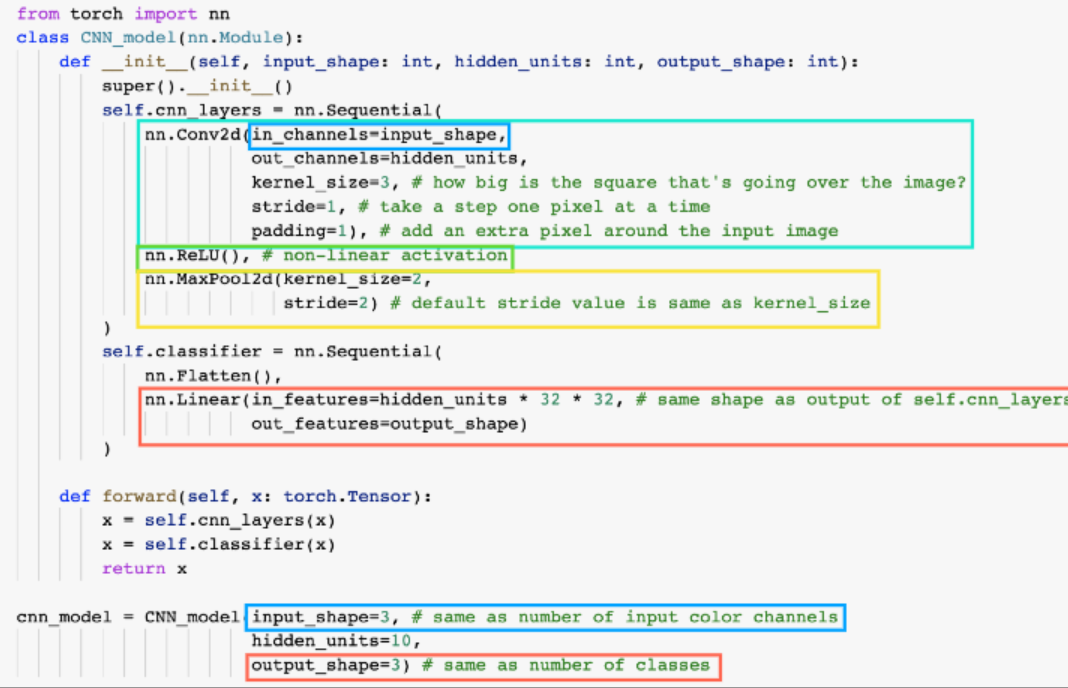

In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

##### **PyTorch `nn.Conv2d` Layer Explanation**

The `nn.Conv2d` layer in PyTorch is used to apply a 2D convolution to an input image or feature map, making it a foundational operation in Convolutional Neural Networks (CNNs). Here’s a deeper look into each parameter and how it influences the convolution operation.

> Parameters

`1. `in_channels` (int)`

- **Description**: Specifies the number of input channels in the image or feature map.
   - For example:
      - Grayscale image: `in_channels=1`
      - RGB image: `in_channels=3`
- **Role**: Tells the layer how many filters to apply per input channel. Input shape is usually `[batch_size, in_channels, height, width]`.

`2. `out_channels` (int)`

- **Description**: Defines the number of filters (or kernels) applied in the convolution. Each filter will produce an output channel.
   - Example: `out_channels=64` results in an output with 64 channels.
- **Role**: Increasing `out_channels` allows the model to learn more complex features, as each filter can capture different aspects of the input.

`3. `kernel_size` (int or tuple)`

- **Description**: Specifies the size of the convolving kernel.
   - Integer (e.g., `kernel_size=3`): Uses a square kernel, e.g., `3x3`.
   - Tuple (e.g., `kernel_size=(3, 5)`): Uses different kernel sizes for height and width, e.g., `3x5`.
- **Role**: Larger kernels capture more context but increase computational cost and may reduce spatial resolution.

`4. `stride` (int or tuple, optional; default: 1)`

- **Description**: Defines the step size of the kernel across the input.
   - Stride of `1`: Moves the kernel one pixel at a time.
   - Stride greater than `1` (e.g., `stride=2`): Skips positions, downsampling the output feature map.
- **Role**: Higher strides reduce the spatial dimensions of the output, providing downsampling without pooling layers.

`5. `padding` (int, tuple, str; default: 0)`

- **Description**: Adds extra rows and columns around the input to control output dimensions.
   - Integer (e.g., `padding=1`): Adds the same padding around all sides.
   - Tuple (e.g., `padding=(1, 2)`): Specifies different padding for height and width.
   - Padding modes like `'same'` and `'valid'` can be used to control output size.
- **Role**: Padding preserves spatial dimensions when desired, preventing excessive shrinking across layers.

In [ ]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                        out_channels= 10,
                        kernel_size=(5,5),
                        stride=2,
                        padding=0)
print(test_image.shape)
print(test_image.unsqueeze(dim=0).shape)

print(conv_layer_2(test_image).shape)
print(conv_layer_2(test_image.unsqueeze(dim=0)).shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])
torch.Size([10, 30, 30])
torch.Size([1, 10, 30, 30])


# Output Shape Calculations

The formula for calculating the output size for a convolution operation is:

[
{Output Size} = {{Input Size} - {Kernel Size} + 2 * {Padding}}  / {{Stride}} + 1
]

## Width and Height Calculation

For an input size of 64, a kernel size of 5, no padding, and a stride of 2:

[
{Output Size} = {64 - 5 + 2 * 0}/{2} + 1 = {59}/{2} + 1 = 29.5 + 1 = 30
]

Thus, the output spatial dimensions will be 30x30.



Now our image is of shape `[1, 10, 30, 30]` (it will be different if you use different values) or `[batch_size=1, color_channels=10, height=30, width=30]`.

What's going on here?

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is *how* the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer `forward()` method.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [ ]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


#### **7.2 Stepping `nn.MaxPool2d()`**


In [ ]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
print(random_tensor.ndim)

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
4

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


# Dimensionality Reduction with `nn.MaxPool2d`

Notice how `random_tensor`'s final dimensions shrink from `[2, 2]` to `[1, 1]` in `max_pool_tensor`. This reduction happens through max pooling, which retains only the maximum value, effectively compressing the data. Different `kernel_size` values in `nn.MaxPool2d()` will produce varied results.

## Compression in Neural Networks

Each neural network layer compresses data, reducing high-dimensional information into smaller, predictive patterns. This "compression" allows neural networks to learn essential features while minimizing complexity.

For example, `nn.MaxPool2d()` reduces dimensionality by selecting maximum values, while `nn.Conv2d()` applies filters to learn patterns.

![Neural Network Compression](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

In essence, neural networks aim to compress information for intelligence.

> **Exercise:** Try `nn.AvgPool2d()` on a random tensor, and observe input and output shapes as well as averaged values.

> **Further Exploration:** Research popular CNN architectures and explore the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library to see how these models might fit your projects.


# Comparison of Popular CNN Architectures

| **Architecture** | **Year** | **Key Features**                                                                                                                                     | **Advantages**                                                                                                                   | **Limitations**                                                                                             | **Common Applications**                         |
|------------------|----------|------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|------------------------------------------------|
| **VGG**         | 2014     | Sequential layers with increasing depth (16 or 19 layers), using only 3x3 convolutions and 2x2 max pooling layers.                                   | Simple design, easy to implement, very effective in feature extraction.                                                           | High computational cost, large model size due to deep structure.                                                 | Image classification, feature extraction.      |
| **ResNet**      | 2015     | Introduced "Residual Blocks" with skip connections that allow gradients to flow directly across layers.                                              | Enables very deep networks (up to 152 layers) without vanishing gradient problems.                                                | Complex design, higher memory usage due to skip connections.                                                    | Image classification, object detection.        |
| **Inception**   | 2014     | Uses "Inception modules" that combine multiple convolutional layers (1x1, 3x3, 5x5) to capture multi-scale features within each layer.              | Efficient multi-scale feature extraction, reduces computational cost through dimensionality reduction.                             | Complex architecture, difficult to optimize.                                                                    | Object detection, face recognition.            |
| **MobileNet**   | 2017     | Lightweight architecture using "Depthwise Separable Convolutions" to reduce the number of parameters and computational cost.                         | High efficiency, suitable for mobile and embedded devices.                                                                        | Lower accuracy compared to larger models.                                                                       | Mobile image processing, real-time applications.|
| **DenseNet**    | 2017     | Each layer receives inputs from all previous layers via "Dense Connections," promoting feature reuse and efficient gradient flow.                    | Reduced number of parameters, efficient feature reuse, alleviates vanishing gradients.                                             | High memory usage due to many connections.                                                                      | Image segmentation, medical imaging.           |
| **Xception**    | 2017     | Extension of Inception, using "Depthwise Separable Convolutions" across channels, resulting in efficient model performance.                          | High accuracy, efficient computational performance, suitable for a variety of tasks.                                              | Not as commonly used as ResNet or VGG, may not be suitable for all applications.                               | Image classification, object detection.        |
| **EfficientNet**| 2019     | Balances depth, width, and resolution of layers based on a scaling formula, resulting in highly efficient models with fewer parameters.              | State-of-the-art performance with fewer parameters, scales well across different tasks.                                           | Complex scaling process, requires extensive fine-tuning.                                                        | Image classification, transfer learning tasks. |

---

### Key Architecture Components Comparison

| **Component**         | **VGG**                   | **ResNet**                  | **Inception**                | **MobileNet**               | **DenseNet**                | **Xception**                 | **EfficientNet**             |
|-----------------------|---------------------------|-----------------------------|------------------------------|-----------------------------|-----------------------------|------------------------------|------------------------------|
| **Convolution Type**  | 3x3 Convolutions          | Standard Convolutions       | Mixed (1x1, 3x3, 5x5)        | Depthwise Separable         | Standard Convolutions       | Depthwise Separable          | Standard Convolutions        |
| **Key Innovation**    | Simple stacking           | Residual connections        | Multi-scale Inception blocks | Depthwise Convolutions      | Dense Connections           | Extreme Inception (Xception) | Compound scaling             |
| **Layers/Depth**      | Deep (16-19 layers)       | Very Deep (up to 152 layers)| Varies based on inception    | Shallow to Medium           | Medium to Deep              | Medium to Deep               | Shallow to Deep              |
| **Model Size**        | Large                     | Medium to Large             | Medium                       | Small                       | Medium                      | Medium                       | Variable (based on scaling)  |
| **Parameter Efficiency** | Low                    | Moderate                    | Moderate                     | High                        | Moderate                    | High                         | Very High                    |
| **Speed**             | Moderate                  | Moderate                    | Moderate                     | High                        | Moderate                    | Moderate                     | High                         |

---

### Performance Comparison on ImageNet

| **Architecture**   | **Top-1 Accuracy (%)** | **Top-5 Accuracy (%)** | **Parameters (Millions)** | **Model Size** | **Speed (FLOPS)**   |
|--------------------|------------------------|-------------------------|---------------------------|----------------|----------------------|
| **VGG-19**         | 71.5                   | 89.9                    | 143                       | Large          | 15.5 GFLOPS         |
| **ResNet-50**      | 76.2                   | 92.9                    | 25.6                      | Medium         | 3.8 GFLOPS          |
| **Inception-V3**   | 77.9                   | 93.7                    | 23.9                      | Medium         | 5.7 GFLOPS          |
| **MobileNet-V2**   | 71.8                   | 91.0                    | 3.4                       | Small          | 0.3 GFLOPS          |
| **DenseNet-121**   | 74.9                   | 92.4                    | 7.98                      | Medium         | 2.9 GFLOPS          |
| **Xception**       | 79.0                   | 94.5                    | 22.8                      | Medium         | 8.4 GFLOPS          |
| **EfficientNet-B0**| 77.1                   | 93.3                    | 5.3                       | Small          | 0.4 GFLOPS          |

---

### Summary

1. **VGG**: Effective but computationally intensive; suitable for feature extraction tasks.
2. **ResNet**: Enables very deep architectures, excellent for complex image classification tasks.
3. **Inception**: Efficient multi-scale processing, good for both image classification and detection.
4. **MobileNet**: Lightweight model for mobile and real-time applications, sacrificing some accuracy for efficiency.
5. **DenseNet**: Reduces parameters while ensuring robust feature reuse, ideal for medical and segmentation tasks.
6. **Xception**: Combines depthwise separable convolutions with Inception-style, good for accuracy-focused tasks.
7. **EfficientNet**: Balances model performance with parameter efficiency, scaling well for a range of tasks.



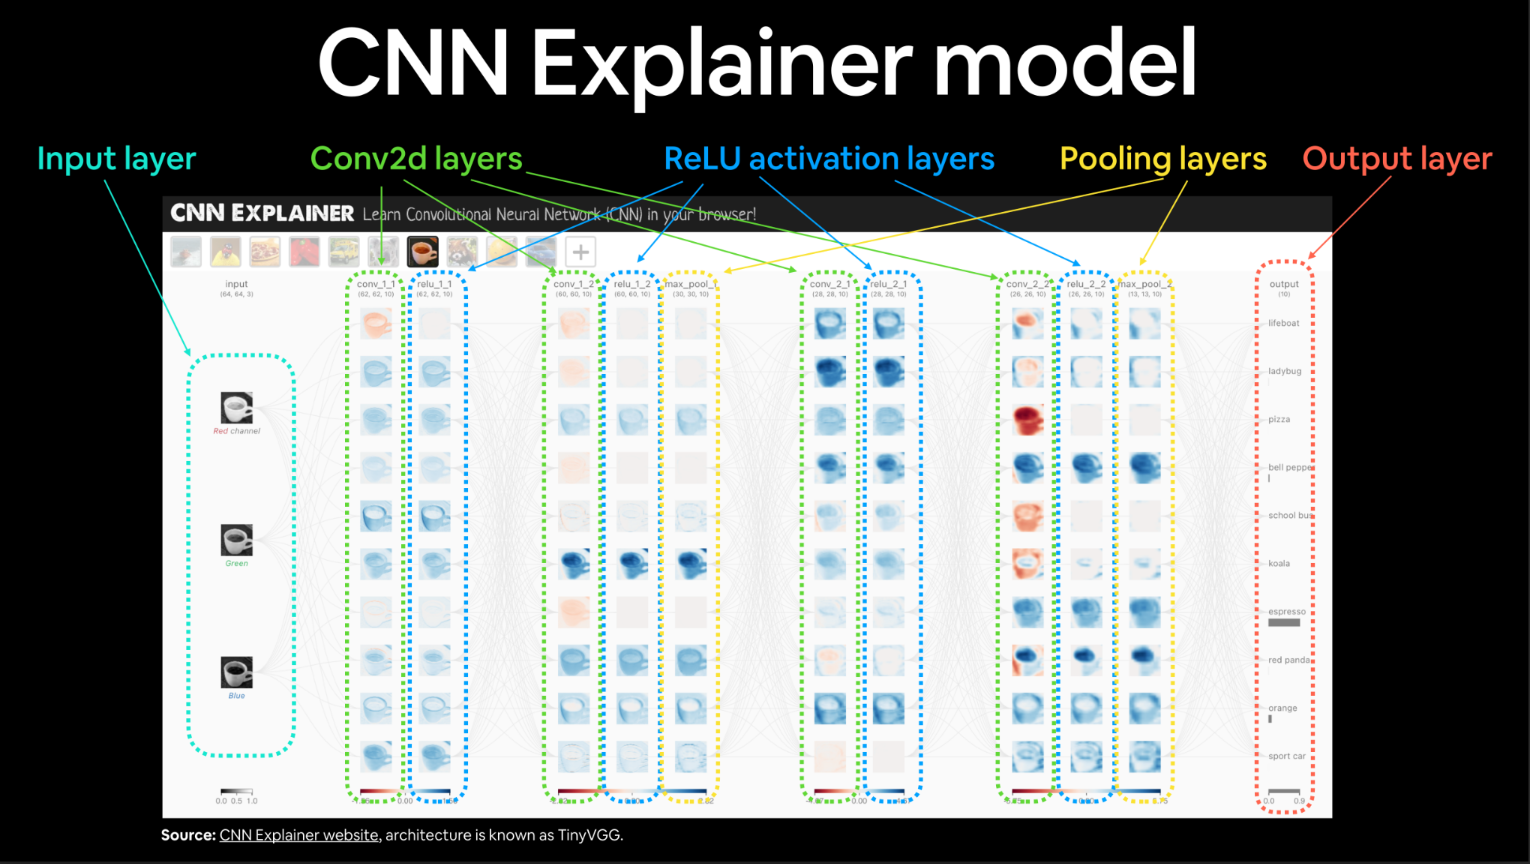

#### **7.3 Setup a loss function and optimizer for model_2**

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr= 0.1)


#### **7.4 training and testing model_2**

In [ ]:
train_dataloader

In [ ]:
model_2

FashionMNISTMODELV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  train_loss,train_acc= 0,0
  # print("1 done")
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # print("2 done")
    #1- forawar pass
    y_pred = model(X)
    # print("3 done")
    # print(f"y_pred shape: {y_pred.shape}, y shape: {y.shape}")
    #2- calculate loss
    loss = loss_fn(y_pred, y)
    # print("4 done")
    train_loss+=loss
    # print("5 done")

    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    # print("6 done")

    #3- optimizer zero grad
    optimizer.zero_grad()

    #4- loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # calculate loss and acc
  train_loss/= len(data_loader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.eval() # pur model in eval mode
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss+= loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
                              )
        # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch {batch}: X shape {X.shape}, y shape {y.shape}")
    X, y = X.to(device), y.to(device)
    ...


Batch 0: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 1: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 2: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 3: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 4: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 5: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 6: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 7: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 8: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 9: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 10: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 11: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 12: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 13: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Ba

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)

  test_step(data_loader=test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on cpu: 209.699 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

### **8. Compare model results**

We've trained three different models.

1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

model_name  model_loss  model_acc  training_time
0  FashionMNISTMODELV0    0.476639  83.426518      47.667337
1  FashionMNISTMODELV1    0.685001  75.019968      41.482970
2  FashionMNISTMODELV2    0.327190  88.069089     209.698611

The tradeoffs here are known as the **performance-speed** tradeoff.
> **Note:** The training times you get will be very dependant on the hardware you use.
>
> Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.
>
> Newer hardware (in terms of age) will also often train models faster due to incorporating technology advances.

How about we get visual?

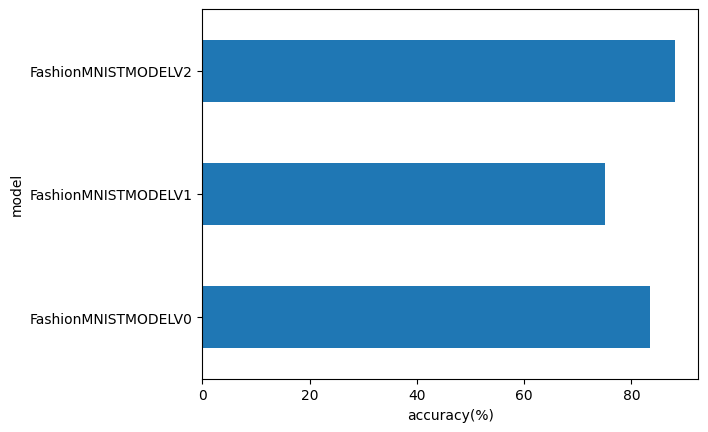

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
"""
This method changes the index of the DataFrame to be the values
in the column named "model_name"
"""
plt.xlabel("accuracy(%)")
plt.ylabel("model");

### **9. Make predictions**

Alright, we've compared our models to each other, let's further evaluate our best performing model, `model_2`.

To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # forward pass
      pred_logit = model(sample)
      # get prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # get pred_prob off GPU
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(f"Test sample image shape:{test_samples[0].shape}")
print(f"{test_labels[0]}")
print(classes_names)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}({classes_names[test_labels[0]]})")


Test sample image shape:torch.Size([1, 28, 28])
5
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5(Sandal)


In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

"Visualize, visualize, visualize!"

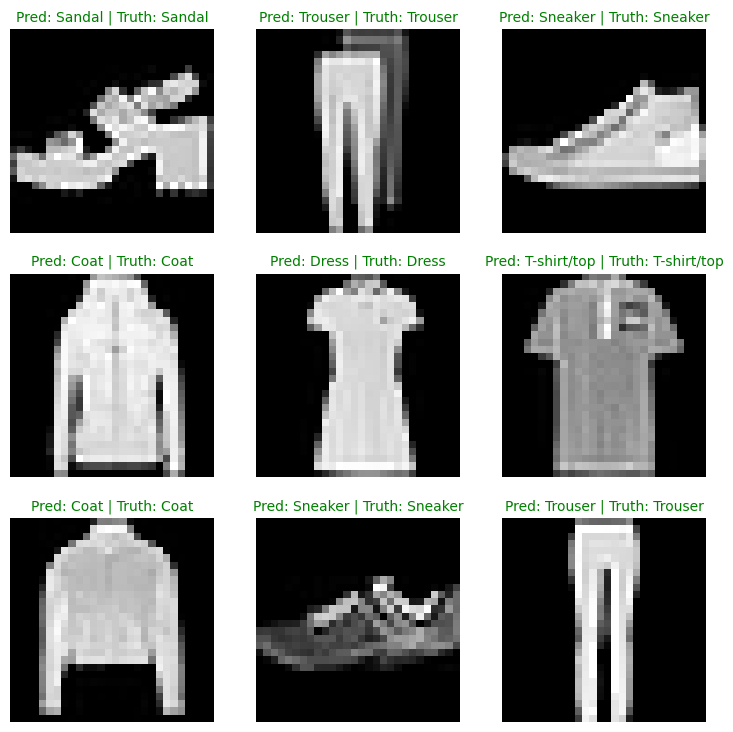

In [ ]:
# plot_predictions
plt.figure(figsize=(9,9))
nrows, ncols= 3, 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)#row, col, index
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = classes_names[pred_classes[i]]
  truth_label = classes_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);


### **10. Making a confusion matrix for further prediction evaluation**

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predicitons and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torch.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).


In [ ]:
from tqdm import tqdm

# make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions"):
    X,y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred= torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions: 100%|██████████| 313/313 [00:06<00:00, 46.63it/s]


tensor([9, 2, 1,  ..., 8, 1, 8])

Now we've got predictions, let's go through steps 2 & 3:
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

First we'll need to make sure we've got `torchmetrics` and `mlxtend` installed (these two libraries will help us make and visual a confusion matrix).

> **Note:** If you're using Google Colab, the default version of `mlxtend` installed is 0.14.0 (as of March 2022), however, for the parameters of the `plot_confusion_matrix()` function we'd like use, we need 0.19.0 or higher.

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1



First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (`preds=y_pred_tensor`) and targets (`target=test_data.targets`).

Finally we can plot our confision matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

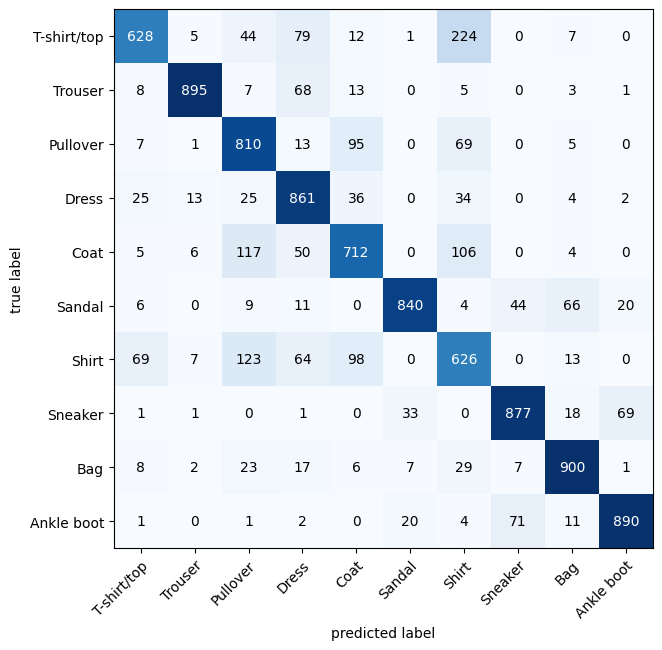

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classes_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
# plotting
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # cause matplot prefer wowrking with numpy
    class_names=classes_names,
    figsize=(10,7)
);

### **11. Save and load best performing model**
we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
loadded_model_2 = FashionMNISTMODELV2(input_shape=1,
                                      hidden_units=10,
                                      output_shape=10)
loadded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send model to device
laodded_model_2 = loadded_model_2.to(device)


<ipython-input-250-7d0fc35c78e0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loadded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08,
              rtol=0.0001)


tensor(True)

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Example solutions notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. What are 3 areas in industry where computer vision is currently being used?
2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
6. Visualize at least 5 different samples of the MNIST training dataset.
7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.
9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.
10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
11. Plot a confusion matrix comparing your model's predictions to the truth labels.
12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    * After visualing these predictions do you think it's more of a modelling error or a data error?
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Extra-curriculum
* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.
* Spend 10-minutes clicking thorugh the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?
* Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?
* For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library `timm`](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.

---

# **3. PyTorch Custom Dataset**



<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pytorch-domain-libraries.png" alt="different pytorch domain libraries can be used for specific PyTorch problems" width=1000/>

*PyTorch includes many existing functions to load in various custom datasets in the [`TorchVision`](https://pytorch.org/vision/stable/index.html), [`TorchText`](https://pytorch.org/text/stable/index.html), [`TorchAudio`](https://pytorch.org/audio/stable/index.html) and [`TorchRec`](https://pytorch.org/torchrec/) domain libraries.*

But sometimes these existing functions may not be enough.

In that case, we can always subclass `torch.utils.data.Dataset` and customize it to our liking.


Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Importing PyTorch and setting up device-agnostic code** | Let's get PyTorch loaded and then follow best practice to setup our code to be device-agnostic.  |
| **1. Get data** | We're going to be using our own **custom dataset** of pizza, steak and sushi images. |
| **2. Become one with the data (data preparation)** | At the beginning of any new machine learning problem, it's paramount to understand the data you're working with. Here we'll take some steps to figure out what data we have. |
| **3. Transforming data** |Often, the data you get won't be 100% ready to use with a machine learning model, here we'll look at some steps we can take to *transform* our images so they're ready to be used with a model. |
| **4. Loading data with `ImageFolder` (option 1)** | PyTorch has many in-built data loading functions for common types of data. `ImageFolder` is helpful if our images are in standard image classification format. |
| **5. Loading image data with a custom `Dataset`** | What if PyTorch didn't have an in-built function to load data with? This is where we can build our own custom subclass of `torch.utils.data.Dataset`. |
| **6. Other forms of transforms (data augmentation)** | Data augmentation is a common technique for expanding the diversity of your training data. Here we'll explore some of `torchvision`'s in-built data augmentation functions. |
| **7. Model 0: TinyVGG without data augmentation** | By this stage, we'll have our data ready, let's build a model capable of fitting it. We'll also create some training and testing functions for training and evaluating our model. |
| **8. Exploring loss curves** | Loss curves are a great way to see how your model is training/improving over time. They're also a good way to see if your model is **underfitting** or **overfitting**. |
| **9. Model 1: TinyVGG with data augmentation** | By now, we've tried a model *without*, how about we try one *with* data augmentation? |
| **10. Compare model results** | Let's compare our different models' loss curves and see which performed better and discuss some options for improving performance. |
| **11. Making a prediction on a custom image** | Our model is trained to on a dataset of pizza, steak and sushi images. In this section we'll cover how to use our trained model to predict on an image *outside* of our existing dataset. |

In [5]:
import torch
from torch import nn

torch.__version__

'2.5.0+cu121'

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [7]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizaa_steak_sushi"
if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)
  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)



Did not find data/pizaa_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...



#### **2. Become one of the data**


Before starting a project or building any kind of model, it's important to know what data you're working with.

In our case, we have images of pizza, steak and sushi in standard image classification format.

Image classification format contains separate classes of images in seperate directories titled with a particular class name.

For example, all images of `pizza` are contained in the `pizza/` directory.

This format is popular across many different image classification benchmarks, including [ImageNet](https://www.image-net.org/) (of the most popular computer vision benchmark datasets).

You can see an example of the storage format below, the images numbers are arbitrary.

```
pizza_steak_sushi/ <- overall dataset folder
    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
```

The goal will be to **take this data storage structure and turn it into a dataset usable with PyTorch**.

> **Note:** The structure of the data you work with will vary depending on the problem you're working on. But the premise still remains: become one with the data, then find a way to best turn it into a dataset compatible with PyTorch.

We can inspect what's in our data directory by writing a small helper function to walk through each of the subdirectories and count the files present.

To do so, we'll use Python's in-built [`os.walk()`](https://docs.python.org/3/library/os.html#os.walk).

In [8]:
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [9]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizaa_steak_sushi'.
There are 3 directories and 0 images in 'data/pizaa_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizaa_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizaa_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizaa_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizaa_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizaa_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizaa_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizaa_steak_sushi/train/steak'.


In [10]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizaa_steak_sushi/train'),
 PosixPath('data/pizaa_steak_sushi/test'))

Let's write some code to:
1. Get all of the image paths using [`pathlib.Path.glob()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob) to find all of the files ending in `.jpg`.

    The pathlib.Path.glob() method finds all files that match a specified pattern within a directory or subdirectory. By using Path.glob('*.jpg')

2. Pick a random image path using Python's [`random.choice()`](https://docs.python.org/3/library/random.html#random.choice).
3. Get the image class name using [`pathlib.Path.parent.stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent).

    pathlib.Path.parent gives the directory name containing the file (essentially the “parent” directory of the image). .stem extracts the directory name without the full path or file extension, which is often used to categorize images

4. And since we're working with images, we'll open the random image path using [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) (PIL stands for Python Image Library).
5. We'll then show the image and print some metadata.

Random image path:data/pizaa_steak_sushi/test/steak/690177.jpg
Image class: steak
Image height: 512
Image width:382


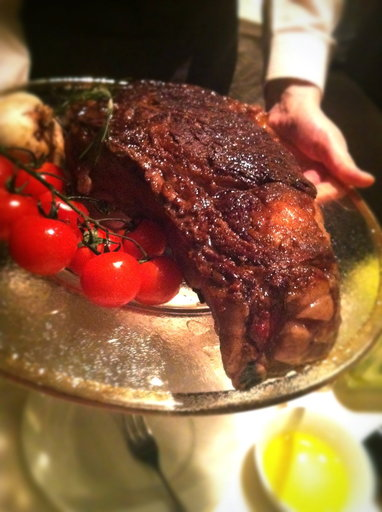

In [11]:
# 2.1 visualize an image
import random
from PIL import Image

random.seed(42)


image_path_list  = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
# open the image
img = Image.open(random_image_path)

print(f"Random image path:{random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width:{img.width}")
img

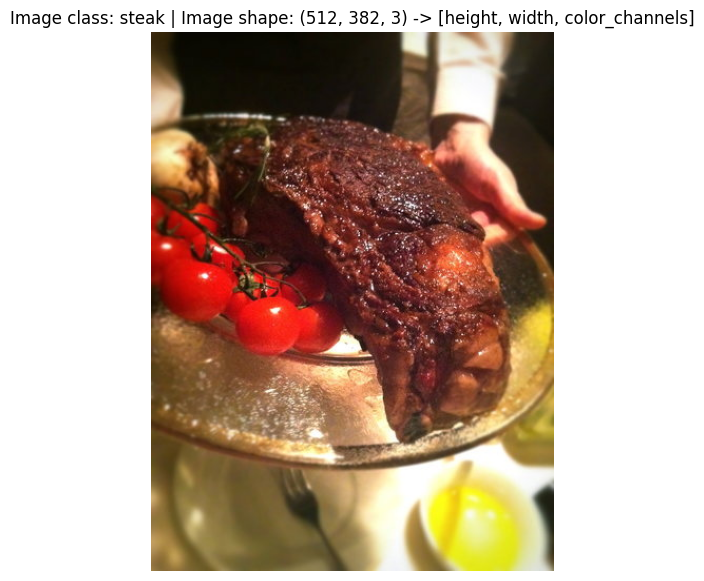

In [12]:
"""
We can do the same with [`matplotlib.pyplot.imshow()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html), except we have to convert the image to a NumPy array first.
"""

import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

### **3. Transforming Data**


Before we can use our image data with PyTorch we need to:

1. Turn it into tensors (numerical representations of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader` for short.

There are several different kinds of pre-built datasets and dataset loaders for PyTorch, depending on the problem you're working on.

| **Problem space** | **Pre-built Datasets and Functions** |
| ----- | ----- |
| **Vision** | [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) |
| **Audio** | [`torchaudio.datasets`](https://pytorch.org/audio/stable/datasets.html) |
| **Text** | [`torchtext.datasets`](https://pytorch.org/text/stable/datasets.html) |
| **Recommendation system** | [`torchrec.datasets`](https://pytorch.org/torchrec/torchrec.datasets.html) |

Since we're working with a vision problem, we'll be looking at `torchvision.datasets` for our data loading functions as well as [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) for preparing our data.



To get experience with `torchvision.transforms`, let's write a series of transform steps that:
1. Resize the images using [`transforms.Resize()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize) (from about 512x512 to 64x64, the same shape as the images on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/)).
2. Flip our images randomly on the horizontal using [`transforms.RandomHorizontalFlip()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip) (this could be considered a form of data augmentation because it will artificially change our image data).
3. Turn our images from a PIL image to a PyTorch tensor using [`transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor).

We can compile all of these steps using [`torchvision.transforms.Compose()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose).

In [13]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


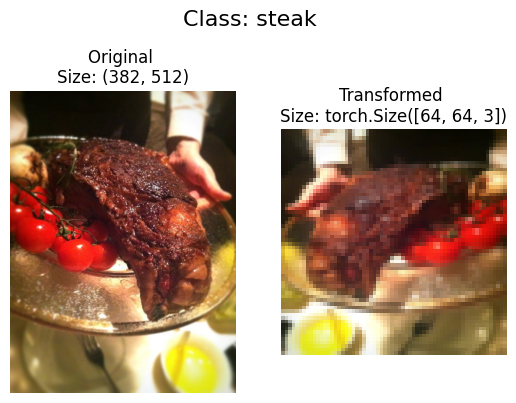

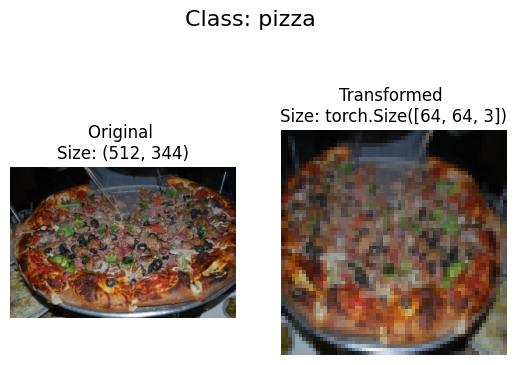

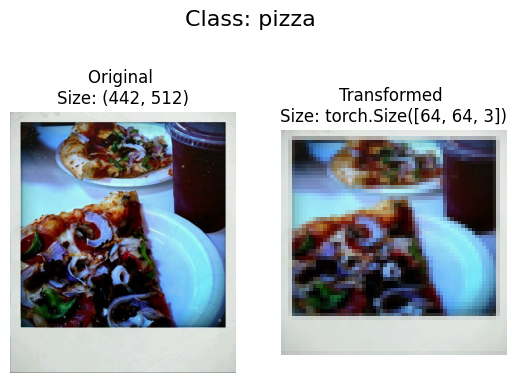

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Plots a series of random images from image_paths.
  Will open n image paths from image_paths, transform them
  with transform and plot them side by side.
  Args:
      image_paths (list): List of target image paths.
      transform (PyTorch Transforms): Transforms to apply to images.
      n (int, optional): Number of images to plot. Defaults to 3.
      seed (int, optional): Random seed for the random generator. Defaults to 42.
  """
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")
            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")
      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)



### **4. option 1: loading image data using [`ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder)**

Alright, time to turn our image data into a `Dataset` capable of being used with PyTorch.

Since our data is in standard image classification format, we can use the class [`torchvision.datasets.ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder).

Where we can pass it the file path of a target image directory as well as a series of transforms we'd like to perform on our images.

Let's test it out on our data folders `train_dir` and `test_dir` passing in `transform=data_transform` to turn our images into tensors.

In [16]:
# use image folder to create datasets

from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,
                                  transform= data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root = test_dir,
                                  transform= data_transform)
"""
Since data_transform only affects images, it doesn’t impact the labels or classes of the images—just the pixel data.
"""
"""
Without target_transform, ImageFolder will automatically assign class labels based on the folder structure where your images are stored.
"""

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizaa_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizaa_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


It looks like PyTorch has registered our `Dataset`'s.

Let's inspect them by checking out the `classes` and `class_to_idx` attributes as well as the lengths of our training and test sets.

In [17]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
len(train_data), len(test_data), train_data[0][0].shape


(225, 75, torch.Size([3, 64, 64]))

In [20]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")



Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


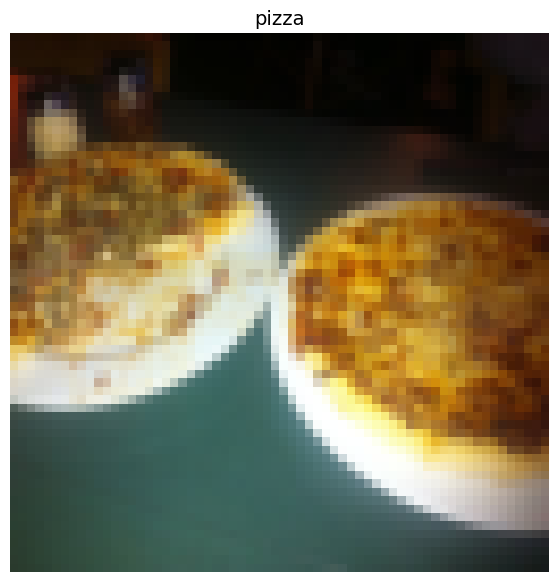

In [21]:
# rearrange order of dims
img_permute = img.permute(1,2,0)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")
plt.figure(figsize=(10,7))

plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### **4.1 Turn loaded images into `DataLoader`'s**

We've got our images as PyTorch `Dataset`'s but now let's turn them into `DataLoader`'s.

We'll do so using [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Turning our `Dataset`'s into `DataLoader`'s makes them iterable so a model can go through learn the relationships between samples and targets (features and labels).

To keep things simple, we'll use a `batch_size=1` and `num_workers=1`.

What's `num_workers`?

Good question.

It defines how many subprocesses will be created to load your data.

Think of it like this, the higher value `num_workers` is set to, the more compute power PyTorch will use to load your data.

Personally, I usually set it to the total number of CPUs on my machine via Python's [`os.cpu_count()`](https://docs.python.org/3/library/os.html#os.cpu_count).

This ensures the `DataLoader` recruits as many cores as possible to load data.

> **Note:** There are more parameters you can get familiar with using `torch.utils.data.DataLoader` in the [PyTorch documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

| Feature                     | **Dataset**                                               | **DataLoader**                                                |
|-----------------------------|-----------------------------------------------------------|---------------------------------------------------------------|
| **Purpose**                 | Defines how to access and process individual data samples | Manages batch loading, shuffling, and parallel processing of data |
| **Main Class**              | `torch.utils.data.Dataset`                                | `torch.utils.data.DataLoader`                                 |
| **Functionality**           | Provides access to samples and their labels               | Provides efficient data batching and sampling                 |
| **Implementation**          | Requires implementing `__len__` and `__getitem__` methods | Wraps a `Dataset` object and configures loading options       |
| **Data Access**             | Returns a single sample at a time                         | Returns a batch of samples at a time                          |
| **Transforms**              | Can apply transformations on individual samples           | Can work with transformed `Dataset` but doesn’t apply transformations itself |
| **Shuffling**               | No built-in shuffling                                     | Supports shuffling the data each epoch with `shuffle=True`    |
| **Parallelism**             | Processes samples sequentially (usually no parallelism)   | Supports parallel loading via `num_workers` parameter         |
| **Common Use Case**         | Customizing data handling and preprocessing               | Efficiently loading batches for training/validation           |
| **Example Usage**           | `dataset = MyDataset()`                                   | `dataloader = DataLoader(dataset, batch_size=32)`             |


In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size= 1,
                             num_workers=1,
                             shuffle=False) # it doesnot matter to shuffle test data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x799901a456c0>,
 <torch.utils.data.dataloader.DataLoader at 0x799901a46500>)

In [23]:
# uses next and iter together to retrieve the first batch from train_dataloader
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")
"""
If label.shape is printed as (batch_size,), this means that label is a 1-dimensional tensor with batch_size elements.
"""

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


'\nIf label.shape is printed as (batch_size,), this means that label is a 1-dimensional tensor with batch_size elements.\n'

### **5. option 2: loading image data with custom dataset**


What if a pre-built `Dataset` creator like [`torchvision.datasets.ImageFolder()`](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder) didn't exist?

Or one for your specific problem didn't exist?

Well, you could build your own.

But wait, what are the pros and cons of creating your own custom way to load `Dataset`'s?

| Pros of creating a custom `Dataset` | Cons of creating a custom `Dataset` |
| ----- | ----- |
| Can create a `Dataset` out of almost anything. | Even though you *could* create a `Dataset` out of almost anything, it doesn't mean it will work. |
| Not limited to PyTorch pre-built `Dataset` functions. | Using a custom `Dataset` often results in writing more code, which could be prone to errors or performance issues. |

To see this in action, let's work towards replicating `torchvision.datasets.ImageFolder()` by subclassing `torch.utils.data.Dataset` (the base class for all `Dataset`'s in PyTorch).

We'll start by importing the modules we need:
* Python's `os` for dealing with directories (our data is stored in directories).
* Python's `pathlib` for dealing with filepaths (each of our images has a unique filepath).
* `torch` for all things PyTorch.
* PIL's `Image` class for loading images.
* `torch.utils.data.Dataset` to subclass and create our own custom `Dataset`.
* `torchvision.transforms` to turn our images into tensors.
* Various types from Python's `typing` module to add type hints to our code.

> **Note:** You can customize the following steps for your own dataset. The premise remains: write code to load your data in the format you'd like it.

| Feature                      | **ImageFolder**                                               | **Custom Dataset**                                                |
|------------------------------|---------------------------------------------------------------|--------------------------------------------------------------------|
| **Purpose**                  | For structured image folders where each subfolder is a class label | For custom loading logic, non-standard folder structures, or additional data sources |
| **Ease of Use**              | Simple, quick setup for common folder structures               | Requires defining `__len__` and `__getitem__` methods             |
| **Folder Structure**         | Assumes a structured format (e.g., `/root/class_name/image.jpg`) | Can handle any folder structure or multiple data sources          |
| **Label Assignment**         | Automatically assigns labels based on subfolder names         | User defines how labels are assigned or derived                   |
| **Transform Support**        | Accepts `transform` and `target_transform` for images and labels | Custom transformations can be applied in `__getitem__`            |
| **Metadata Inclusion**       | Limited to image paths and derived labels                      | Can include additional metadata (e.g., bounding boxes, captions)   |
| **File Types Supported**     | Restricted to file extensions supported by `ImageFolder`       | Flexible; user can specify any file loading logic                 |
| **Complexity**               | Best for straightforward, labeled image datasets               | Necessary for datasets needing complex logic or preprocessing      |
| **Performance**              | Optimized for directory-based images and simple labels         | Performance depends on custom code (can be optimized for special cases) |
| **Use Case Examples**        | Standard image classification tasks                           | Custom data requirements like multi-label classification, image segmentation, or multi-modal data |


In [24]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [25]:
"""
Remember how our instances of `torchvision.datasets.ImageFolder()`
allowed us to use the `classes` and `class_to_idx` attributes?
"""
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### **5.1 Creating a helper function to get class names**

Let's write a helper function capable of creating a list of class names and a dictionary of class names and their indexes given a directory path.

To do so, we'll:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dictionary of numerical labels, one for each class.

Let's see a small example of step 1 before we write the full function.

In [26]:
target_directory = train_dir
print(f"Target directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizaa_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [27]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory.

  Assumes target directory is in standard image classification format.
  Args:
      directory (str): target directory to load classnames from.
  Returns:
      Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

  Example:
      find_classes("food_images/train")
      >>> (["class_1", "class_2"], {"class_1": 0, ...})
  """
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

  return classes, class_to_idx

In [28]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### **5.2 Create a custom `Dataset` to replicate `ImageFolder`**

Now we're ready to build our own custom `Dataset`.

We'll build one to replicate the functionality of `torchvision.datasets.ImageFolder()`.

This will be good practice, plus, it'll reveal a few of the required steps to make your own custom `Dataset`.

It'll be a fair bit of a code... but nothing we can't handle!

Let's break it down:
1. Subclass `torch.utils.data.Dataset`.
2. Initialize our subclass with a `targ_dir` parameter (the target data directory) and `transform` parameter (so we have the option to transform our data if needed).
3. Create several attributes for `paths` (the paths of our target images), `transform` (the transforms we might like to use, this can be `None`), `classes` and `class_to_idx` (from our `find_classes()` function).
4. Create a function to load images from file and return them, this could be using `PIL` or [`torchvision.io`](https://pytorch.org/vision/stable/io.html#image) (for input/output of vision data).
5. Overwrite the `__len__` method of `torch.utils.data.Dataset` to return the number of samples in the `Dataset`, this is recommended but not required. This is so you can call `len(Dataset)`.
6. Overwrite the `__getitem__` method of `torch.utils.data.Dataset` to return a single sample from the `Dataset`, this is required.

Let's do it!

In [29]:
from torch.utils.data import Dataset

# subclass
class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str, transform=None) -> None:
    # create class attributes
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # overwritte
  def __len__(self) -> int:
    "return total number of sample"
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "return one sample , data and label"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx




In [30]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

Let's turn our training images (contained in `train_dir`) and our testing images (contained in `test_dir`) into `Dataset`'s using our own `ImageFolderCustom` class.

In [31]:
train_data_custom = ImageFolderCustom(targ_dir= train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom


(<__main__.ImageFolderCustom at 0x7999022bf220>,
 <__main__.ImageFolderCustom at 0x7999022bf610>)

In [32]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [33]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [34]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [35]:
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


#### **5.3 create function to display random images**

's create a helper function called `display_random_images()` that helps us visualize images in our `Dataset'`s.

Specifically, it'll:
1. Take in a `Dataset` and a number of other parameters such as `classes` (the names of our target classes), the number of images to display (`n`) and a random seed.
2. To prevent the display getting out of hand, we'll cap `n` at 10 images.
3. Set the random seed for reproducible plots (if `seed` is set).
4. Get a list of random sample indexes (we can use Python's `random.sample()` for this) to plot.
5. Setup a `matplotlib` plot.
6. Loop through the random sample indexes found in step 4 and plot them with `matplotlib`.
7. Make sure the sample images are of shape `HWC` (height, width, color channels) so we can plot them.

In [36]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_Shape= False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16, 8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



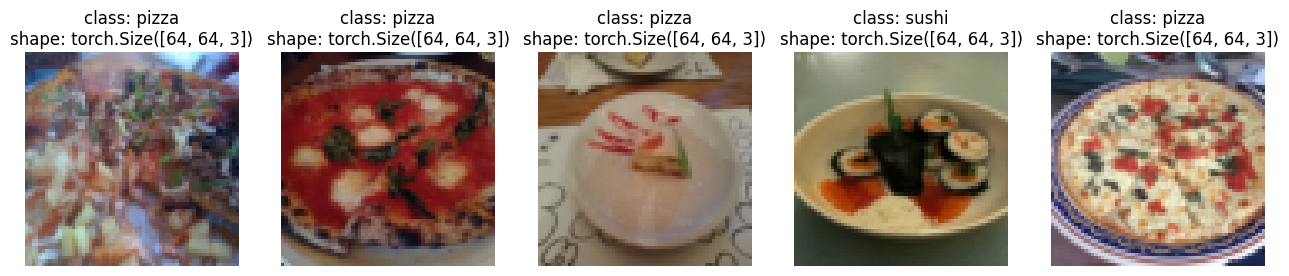

In [37]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


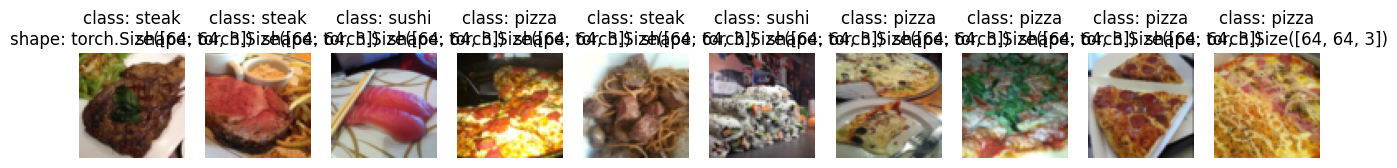

In [38]:
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None)

#### **5.4 Turn custom loaded images into `DataLoader`'s **

We've got a way to turn our raw images into `Dataset`'s (features mapped to labels or `X`'s mapped to `y`'s) through our `ImageFolderCustom` class.

Now how could we turn our custom `Dataset`'s into `DataLoader`'s?

If you guessed by using `torch.utils.data.DataLoader()`, you'd be right!

Because our custom `Dataset`'s subclass `torch.utils.data.Dataset`, we can use them directly with `torch.utils.data.DataLoader()`.

And we can do using very similar steps to before except this time we'll be using our custom created `Dataset`'s.

In [39]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset= train_data_custom,
                                     batch_size = 1,
                                     num_workers=0,
                                     shuffle= True)
test_dataloader_custom = DataLoader(dataset= test_data_custom,
                                     batch_size = 1,
                                     num_workers=0,
                                     shuffle= True)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x799901151fc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7999011538e0>)

In [40]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### **6. other forms of transforms (data augmentation)**

You can see them all in the [`torchvision.transforms` documentation](https://pytorch.org/vision/stable/transforms.html).

**Data augmentation** is the process of altering your data in such a way that you *artificially* increase the diversity of your training set.

You can see many different examples of data augmentation performed on images using `torchvision.transforms` in PyTorch's [Illustration of Transforms example](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html).

Machine learning is all about harnessing the power of randomness and research shows that random transforms (like [`transforms.RandAugment()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#randaugment) and [`transforms.TrivialAugmentWide()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#trivialaugmentwide)) generally perform better than hand-picked transforms.

The idea behind [TrivialAugment](https://arxiv.org/abs/2103.10158) is... well, trivial.

The PyTorch team even [used TrivialAugment it to train their latest state-of-the-art vision models](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements).

![trivial augment data augmentation being used for PyTorch state of the art training](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-trivial-augment-being-using-in-PyTorch-resize.png)

*TrivialAugment was one of the ingredients used in a recent state of the art training upgrade to various PyTorch vision models.*

The main parameter to pay attention to in `transforms.TrivialAugmentWide()` is `num_magnitude_bins=31`.

It defines how much of a range an intensity value will be picked to apply a certain transform, `0` being no range and `31` being maximum range (highest chance for highest intensity).

We can incorporate `transforms.TrivialAugmentWide()` into `transforms.Compose()`.

In [41]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])



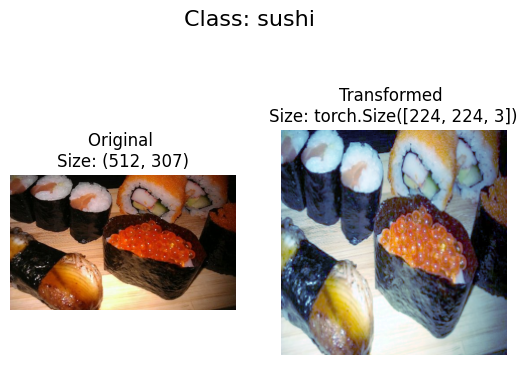

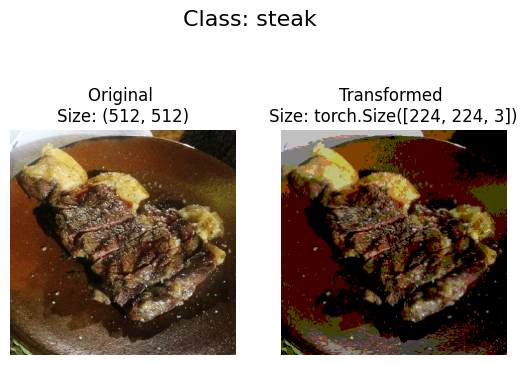

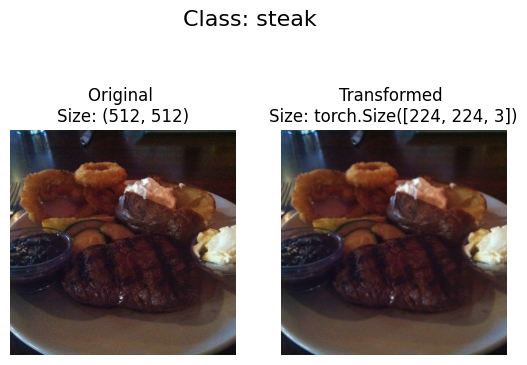

In [42]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(
    image_paths = image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

### **7. Model 0: TinyVGG without data augmentation**



In [43]:
# 7.1
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [44]:
from torchvision import datasets
train_data_sample = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_sample  = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# turn data to dataloader
import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")


train_dataloader_sample = DataLoader(train_data_sample,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_sample = DataLoader(test_data_sample,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

train_dataloader_sample, test_dataloader_sample

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x799901114520>,
 <torch.utils.data.dataloader.DataLoader at 0x7999012f7f10>)

In [45]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) ->   None:
    super().__init__()
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*16*16,
                  out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

> > **Note:** One of the ways to speed up deep learning models computing on a GPU is to leverage **operator fusion**.
>
> This means in the `forward()` method in our model above, instead of calling a layer block and reassigning `x` every time, we call each block in succession (see the final line of the `forward()` method in the model above for an example).
>
> This saves the time spent reassigning `x` (memory heavy) and focuses on only computing on `x`.
>
> See [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) by Horace He for more ways on how to speed up machine learning models.

Now that's a nice looking model!

How about we test it out with a forward pass on a single image?



#### **7.3 Try a forward pass on a single image (to test the model)**

A good way to test a model is to do a forward pass on a single piece of data.

It's also handy way to test the input and output shapes of our different layers.

To do a forward pass on a single image, let's:
1. Get a batch of images and labels from the `DataLoader`.
2. Get a single image from the batch and `unsqueeze()` the image so it has a batch size of `1` (so its shape fits the model).
3. Perform inference on a single image (making sure to send the image to the target `device`).
4. Print out what's happening and convert the model's raw output logits to prediction probabilities with `torch.softmax()` (since we're working with multi-class data) and convert the prediction probabilities to prediction labels with `torch.argmax()`.

In [46]:
img_batch, label_batch = next(iter(train_dataloader_sample))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")


model_0.eval()
with torch.inference_mode():
  pred_logit = model_0(img_single.to(device))

print(f"Output logits:\n{pred_logit}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred_logit, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred_logit, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")


"""
RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2560 and 10x3)
"""


Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


'\nRuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2560 and 10x3)\n'

#### **7.4 Use `torchinfo` to get an idea of the shapes going through our model**

Printing out our model with `print(model)` gives us an idea of what's going on with our model.

And we can print out the shapes of our data throughout the `forward()` method.

However, a helpful way to get information from our model is to use [`torchinfo`](https://github.com/TylerYep/torchinfo).

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.

> **Note:** If you're using Google Colab, you'll need to install `torchinfo`.

In [47]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

#### **7.5 train and test loop**

In [48]:
import torch
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [49]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [50]:
from tqdm.auto import tqdm
from torch import nn
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc= train_step(model=model,
                                      dataloader= train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
    print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}"
    )
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    # 6. Return the filled results at the end of the epochs
  return results

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_sample,
                        test_dataloader=test_dataloader_sample,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Total training time: 12.327 seconds


In [52]:
model_0_results.items()

dict_items([('train_loss', [1.1078356951475143, 1.0846453607082367, 1.1152610331773758, 1.0990152657032013, 1.0989657938480377]), ('train_acc', [0.2578125, 0.42578125, 0.29296875, 0.2890625, 0.29296875]), ('test_loss', [1.1362075010935466, 1.1621707677841187, 1.169488827387492, 1.1343015034993489, 1.14342466990153]), ('test_acc', [0.2604166666666667, 0.19791666666666666, 0.19791666666666666, 0.19791666666666666, 0.19791666666666666])])

#### **7.8 Plot the loss curves of Model 0**


In [53]:
from typing import Dict, List
import matplotlib.pyplot as plt

def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary.
  Args:
      results (dict): dictionary containing list of values, e.g.
          {"train_loss": [...],
           "train_acc": [...],
           "test_loss": [...],
           "test_acc": [...]}
  """
  loss = results['train_loss']
  test_loss= results['test_loss']
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15, 7 ))

  # plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();



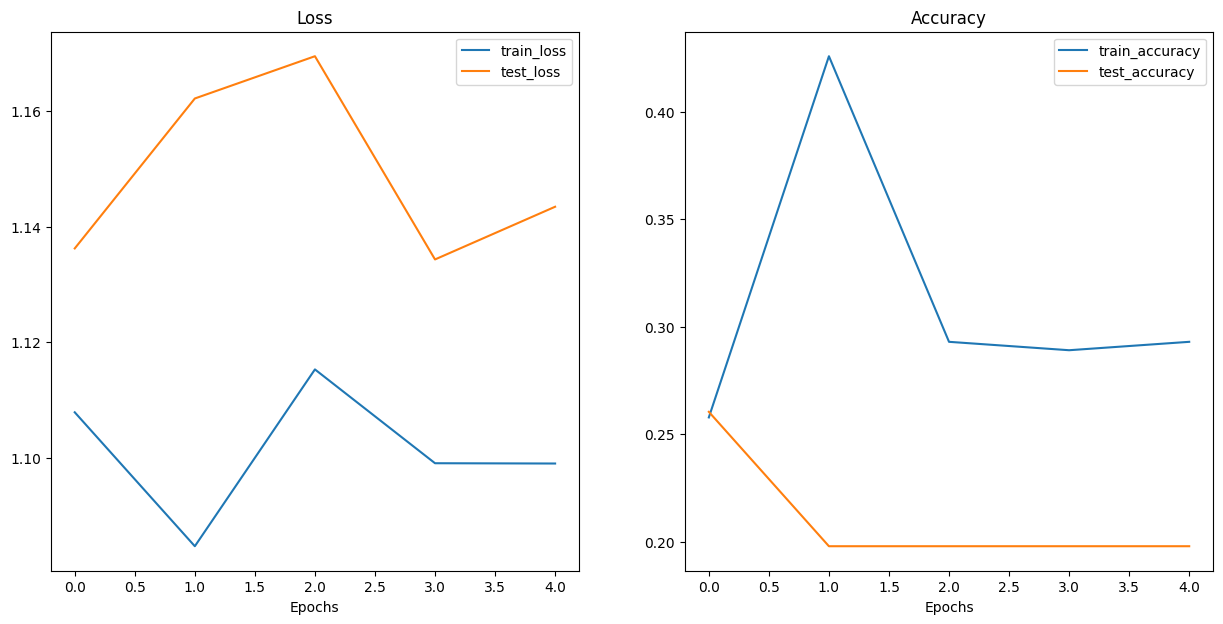

In [54]:
plot_loss_curves(model_0_results)

### **8. Loss Curve**

If your training loss is far lower than your test loss, your model is **overfitting**.

The other side is when your training and test loss are not as low as you'd like, this is considered **underfitting**.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="different training and test loss curves illustrating overfitting, underfitting and the ideal loss curves" width="800"/>

*Left: If your training and test loss curves aren't as low as you'd like, this is considered **underfitting**. *Middle:* When your test/validation loss is higher than your training loss this is considered **overfitting**. *Right:* The ideal scenario is when your training and test loss curves line up over time. This means your model is generalizing well. There are more combinations and different things loss curves can do, for more on these, see Google's [Interpreting Loss Curves guide](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic).*



| **Method to prevent overfitting** | **What is it?** |
| ----- | ----- |
| **Get more data** | Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples. |
| **Simplify your model** | If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer. |
| **Use data augmentation** | [**Data augmentation**](https://developers.google.com/machine-learning/glossary#data-augmentation) manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data. |
| **Use transfer learning** | [**Transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning) involves leveraging the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images. |
| **Use dropout layers** | Dropout layers randomly remove connections between hidden layers in neural networks, effectively simplifying a model but also making the remaining connections better. See [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) for more. |
| **Use learning rate decay** | The idea here is to slowly decrease the learning rate as a model trains. This is akin to reaching for a coin at the back of a couch. The closer you get, the smaller your steps. The same with the learning rate, the closer you get to [**convergence**](https://developers.google.com/machine-learning/glossary#convergence), the smaller you'll want your weight updates to be.  |
| **Use early stopping** | [**Early stopping**](https://developers.google.com/machine-learning/glossary#early_stopping) stops model training *before* it begins to overfit. As in, say the model's loss has stopped decreasing for the past 10 epochs (this number is arbitrary), you may want to stop the model training here and go with the model weights that had the lowest loss (10 epochs prior). |





| **Method to prevent underfitting** | **What is it?** |
| ----- | ----- |
| **Add more layers/units to your model** | If your model is underfitting, it may not have enough capability to *learn* the required patterns/weights/representations of the data to be predictive. One way to add more predictive power to your model is to increase the number of hidden layers/units within those layers. |
| **Tweak the learning rate** | Perhaps your model's learning rate is too high to begin with. And it's trying to update its weights each epoch too much, in turn not learning anything. In this case, you might lower the learning rate and see what happens. |
| **Use transfer learning** | Transfer learning is capable of preventing overfitting and underfitting. It involves using the patterns from a previously working model and adjusting them to your own problem. |
| **Train for longer** | Sometimes a model just needs more time to learn representations of data. If you find in your smaller experiments your model isn't learning anything, perhaps leaving it train for a more epochs may result in better performance. |
| **Use less regularization** | Perhaps your model is underfitting because you're trying to prevent overfitting too much. Holding back on regularization techniques can help your model fit the data better. |

### **9. Model-1 with Data Augmentation**

In [60]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

print(train_data_augmented), print(test_data_simple)

import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

print(train_dataloader_augmented), print(test_dataloader)

# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizaa_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizaa_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [61]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
Total training time: 14.365 seconds


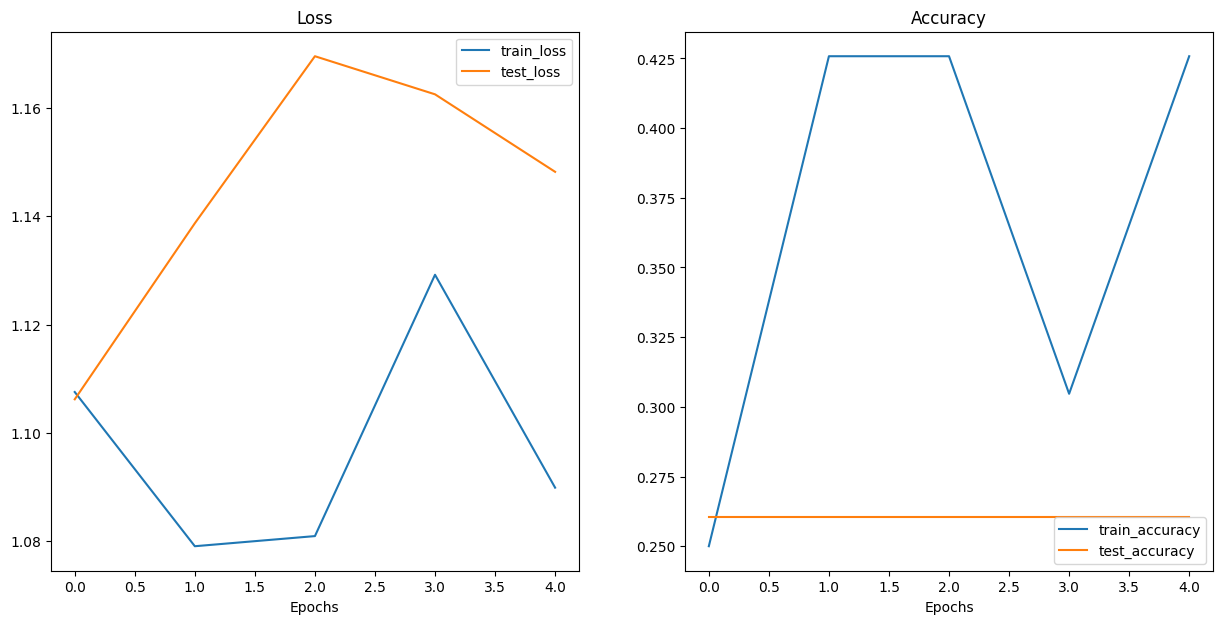

In [62]:
plot_loss_curves(model_1_results)

In [64]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df.head(), model_1_df.head()

(   train_loss  train_acc  test_loss  test_acc
 0    1.107836   0.257812   1.136208  0.260417
 1    1.084645   0.425781   1.162171  0.197917
 2    1.115261   0.292969   1.169489  0.197917
 3    1.099015   0.289062   1.134302  0.197917
 4    1.098966   0.292969   1.143425  0.197917,
    train_loss  train_acc  test_loss  test_acc
 0    1.107567   0.250000   1.106220  0.260417
 1    1.079097   0.425781   1.138719  0.260417
 2    1.080967   0.425781   1.169558  0.260417
 3    1.129214   0.304688   1.162525  0.260417
 4    1.089909   0.425781   1.148216  0.260417)

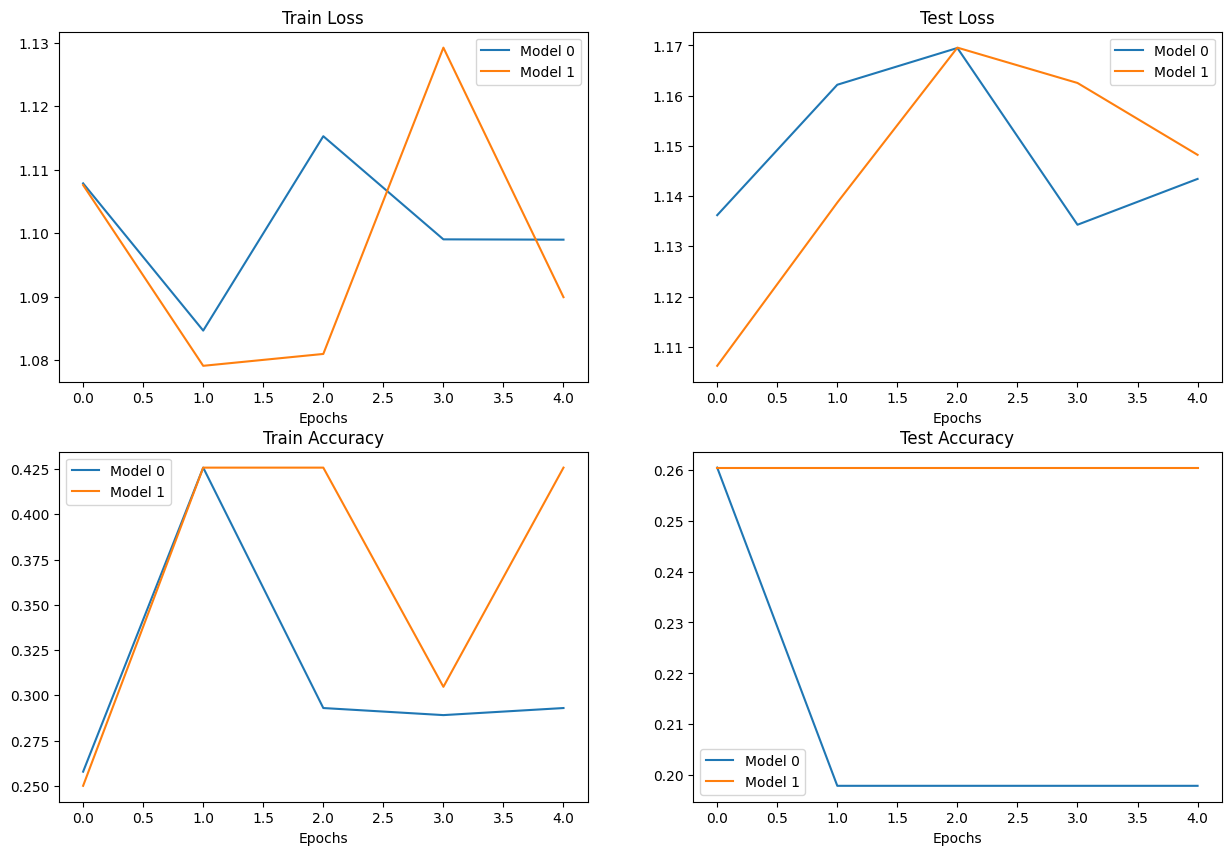

In [65]:
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

It looks like our models both performed equally poorly and were kind of sporadic (the metrics go up and down sharply).

If you built `model_2`, what would you do differently to try and improve performance?

### **11. Make a prediction on a custom image**


In [66]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

PyTorch's `torchvision` has several input and output ("IO" or "io" for short) methods for reading and writing images and video in [`torchvision.io`](https://pytorch.org/vision/stable/io.html).

Since we want to load in an image, we'll use [`torchvision.io.read_image()`](https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html#torchvision.io.read_image).

This method will read a JPEG or PNG image and turn it into a 3 dimensional RGB or grayscale `torch.Tensor` with values of datatype `uint8` in range `[0, 255]`.


In [67]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty


Our `custom_image` tensor is of datatype `torch.uint8` and its values are between `[0, 255]`.

But our model takes image tensors of datatype `torch.float32` and with values between `[0, 1]`.

So before we use our custom image with our model, **we'll need to convert it to the same format as the data our model is trained on**.

In [68]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [70]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image/255.

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..


Our model was trained on images with shape `[3, 64, 64]`, whereas our custom image is currently `[3, 4032, 3024]`.

How could we make sure our custom image is the same shape as the images our model was trained on?

Are there any `torchvision.transforms` that could help?

Before we answer that question, let's plot the image with `matplotlib` to make sure it looks okay, remember we'll have to permute the dimensions from `CHW` to `HWC` to suit `matplotlib`'s requirements.

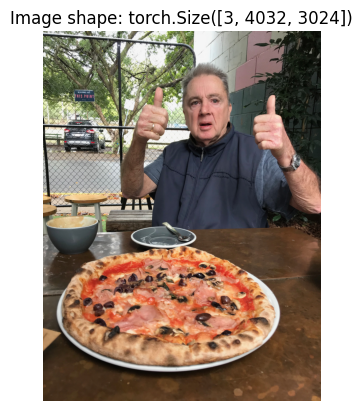

In [71]:
plt.imshow(custom_image.permute(1,2,0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [73]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64,64)),
])

custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [74]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [75]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [76]:
(custom_image_transformed.unsqueeze(dim=0)).shape

torch.Size([1, 3, 64, 64])

In [78]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0))

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))


In [82]:
model_1.eval()
with torch.inference_mode():
  custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

In [83]:
print(f"Custom image transformed shape: {custom_image_transformed.shape}")
print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [84]:
custom_image_pred

tensor([[ 0.1188,  0.0339, -0.1486]])

In [85]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1188,  0.0339, -0.1486]])
Prediction probabilities: tensor([[0.3726, 0.3422, 0.2852]])
Prediction label: tensor([0])


In [86]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'

In [87]:
custom_image_pred_probs

tensor([[0.3726, 0.3422, 0.2852]])

#### **11.3 Putting custom image prediction together: building a function**


So let's put them all together in a function we can easily use over and over again.

Specifically, let's make a function that:
1. Takes in a target image path and converts to the right datatype for our model (`torch.float32`).
2. Makes sure the target image pixel values are in the range `[0, 1]`.
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.

In [88]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str]= None,
                        transform=None,
                        device: torch.device = device):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image / 255.
  if transform:
    target_image = transform(target_image)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image= ((target_image.unsqueeze(dim=0)).to(device))
    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
  if class_names:
      title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
      title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);



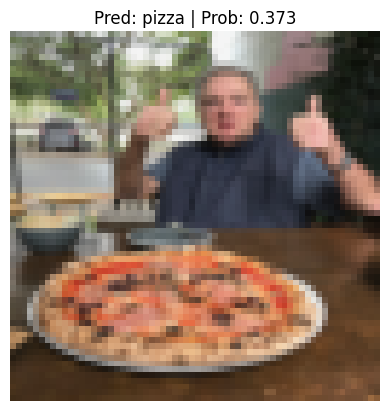

In [89]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 04](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb)
* [Example solutions notebook for 04](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/04_pytorch_custom_datasets_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.
2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test `DataLoader`'s ready to use.
3. Recreate `model_0` we built in section 7.
4. Create training and testing functions for `model_0`.
5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
    * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.
6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?
7. Double the data you're using with your model and train it for 20 epochs, what happens to the results?
    * **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
    * You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.
8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction.
    * Does the model you trained in exercise 7 get it right?
    * If not, what do you think you could do to improve it?

## Extra-curriculum

* To practice your knowledge of PyTorch `Dataset`'s and `DataLoader`'s through PyTorch [datasets and dataloaders tutorial notebook](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).
* Spend 10-minutes reading the [PyTorch `torchvision.transforms` documentation](https://pytorch.org/vision/stable/transforms.html).
    * You can see demos of transforms in action in the [illustrations of transforms tutorial](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html).
* Spend 10-minutes reading the PyTorch [`torchvision.datasets` documentation](https://pytorch.org/vision/stable/datasets.html).
    * What are some datasets that stand out to you?
    * How could you try building a model on these?
* [TorchData is currently in beta](https://pytorch.org/data/beta/index.html) (as of April 2022), it'll be a future way of loading data in PyTorch, but you can start to check it out now.
* To speed up deep learning models, you can do a few tricks to improve compute, memory and overhead computations, for more read the post [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) by Horace He.

# **SW Design and Implementation**

# 05. PyTorch Going Modular

This section answers the question, "how do I turn my notebook code into Python scripts?"

To do so, we're going to turn the most useful code cells in [notebook 04. PyTorch Custom Datasets](https://www.learnpytorch.io/04_pytorch_custom_datasets/) into a series of Python scripts saved to a directory called [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular).

## What is going modular?

Going modular involves turning notebook code (from a Jupyter Notebook or Google Colab notebook) into a series of different Python scripts that offer similar functionality.

For example, we could turn our notebook code from a series of cells into the following Python files:

* `data_setup.py` - a file to prepare and download data if needed.
* `engine.py` - a file containing various training functions.
* `model_builder.py` or `model.py` - a file to create a PyTorch model.
* `train.py` - a file to leverage all other files and train a target PyTorch model.
* `utils.py` - a file dedicated to helpful utility functions.

> **Note:** The naming and layout of the above files will depend on your use case and code requirements. Python scripts are as general as individual notebook cells, meaning, you could create one for almost any kind of functionality.

## Why would you want to go modular?

Notebooks are fantastic for iteratively exploring and running experiments quickly.

However, for larger scale projects you may find Python scripts more reproducible and easier to run.

Though this is a debated topic, as companies like [Netflix have shown how they use notebooks for production code](https://netflixtechblog.com/notebook-innovation-591ee3221233).

**Production code** is code that runs to offer a service to someone or something.

For example, if you have an app running online that other people can access and use, the code running that app is considered **production code**.

And libraries like fast.ai's [`nb-dev`](https://github.com/fastai/nbdev) (short for notebook development) enable you to write whole Python libraries (including documentation) with Jupyter Notebooks.

### Pros and cons of notebooks vs Python scripts

There's arguments for both sides.

But this list sums up a few of the main topics.

|               | **Pros**                                               | **Cons**                                     |
| ------------- | ------------------------------------------------------ | -------------------------------------------- |
| **Notebooks** | Easy to experiment/get started                         | Versioning can be hard                       |
|               | Easy to share (e.g. a link to a Google Colab notebook) | Hard to use only specific parts              |
|               | Very visual                                            | Text and graphics can get in the way of code |

|                    | **Pros**                                                                            | **Cons**                                                                                  |
| ------------------ | ----------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **Python scripts** | Can package code together (saves rewriting similar code across different notebooks) | Experimenting isn't as visual (usually have to run the whole script rather than one cell) |
|                    | Can use git for versioning                                                          |                                                                                           |
|                    | Many open source projects use scripts                                               |                                                                                           |
|                    | Larger projects can be run on cloud vendors (not as much support for notebooks)     |                                                                                           |

### My workflow

I usually start machine learning projects in Jupyter/Google Colab notebooks for quick experimentation and visualization.

Then when I've got something working, I move the most useful pieces of code to Python scripts.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/05-my-workflow-for-experimenting.png" alt="one possible workflow for writing machine learning code, start with jupyter or google colab notebooks and then move to Python scripts when you've got something working." width=1000/>

*There are many possible workflows for writing machine learning code. Some prefer to start with scripts, others (like me) prefer to start with notebooks and go to scripts later on.*

### PyTorch in the wild

In your travels, you'll see many code repositories for PyTorch-based ML projects have instructions on how to run the PyTorch code in the form of Python scripts.

For example, you might be instructed to run code like the following in a terminal/command line to train a model:

```
python train.py --model MODEL_NAME --batch_size BATCH_SIZE --lr LEARNING_RATE --num_epochs NUM_EPOCHS
```

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/05-python-train-command-line-annotated.png" alt="command line call for training a PyTorch model with different hyperparameters" width=1000/>

*Running a PyTorch `train.py` script on the command line with various hyperparameter settings.*

In this case, `train.py` is the target Python script, it'll likely contain functions to train a PyTorch model.

And `--model`, `--batch_size`, `--lr` and `--num_epochs` are known as argument flags.

You can set these to whatever values you like and if they're compatible with `train.py`, they'll work, if not, they'll error.

For example, let's say we wanted to train our TinyVGG model from notebook 04 for 10 epochs with a batch size of 32 and a learning rate of 0.001:

```
python train.py --model tinyvgg --batch_size 32 --lr 0.001 --num_epochs 10
```

You could setup any number of these argument flags in your `train.py` script to suit your needs.

The PyTorch blog post for training state-of-the-art computer vision models uses this style.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/05-training-sota-recipe.png" alt="PyTorch training script recipe for training state of the art computer vision models" width=800/>

*PyTorch command line training script recipe for training state-of-the-art computer vision models with 8 GPUs. Source: [PyTorch blog](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#the-training-recipe).*

## What we're going to cover

The main concept of this section is: **turn useful notebook code cells into reusable Python files.**

Doing this will save us writing the same code over and over again.

There are two notebooks for this section:

1. [**05. Going Modular: Part 1 (cell mode)**](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_cell_mode.ipynb) - this notebook is run as a traditional Jupyter Notebook/Google Colab notebook and is a condensed version of [notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. [**05. Going Modular: Part 2 (script mode)**](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_script_mode.ipynb) - this notebook is the same as number 1 but with added functionality to turn each of the major sections into Python scripts, such as, `data_setup.py` and `train.py`.

The text in this document focuses on the code cells 05. Going Modular: Part 2 (script mode), the ones with `%%writefile ...` at the top.

### Why two parts?

Because sometimes the best way to learn something is to see how it *differs* from something else.

If you run each notebook side-by-side you'll see how they differ and that's where the key learnings are.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/05-notebook-cell-mode-vs-script-mode.png" alt="running cell mode notebook vs a script mode notebook" width=1000/>

*Running the two notebooks for section 05 side-by-side. You'll notice that the **script mode notebook has extra code cells** to turn code from the cell mode notebook into Python scripts.*

### What we're working towards

By the end of this section we want to have two things:

1. The ability to train the model we built in notebook 04 (Food Vision Mini) with one line of code on the command line: `python train.py`.
2. A directory structure of reusable Python scripts, such as:

```
going_modular/
├── going_modular/
│   ├── data_setup.py
│   ├── engine.py
│   ├── model_builder.py
│   ├── train.py
│   └── utils.py
├── models/
│   ├── 05_going_modular_cell_mode_tinyvgg_model.pth
│   └── 05_going_modular_script_mode_tinyvgg_model.pth
└── data/
    └── pizza_steak_sushi/
        ├── train/
        │   ├── pizza/
        │   │   ├── image01.jpeg
        │   │   └── ...
        │   ├── steak/
        │   └── sushi/
        └── test/
            ├── pizza/
            ├── steak/
            └── sushi/
```

### Things to note

* **Docstrings** - Writing reproducible and understandable code is important. And with this in mind, each of the functions/classes we'll be putting into scripts has been created with Google's [Python docstring style in mind](https://google.github.io/styleguide/pyguide.html#383-functions-and-methods).
* **Imports at the top of scripts** - Since all of the Python scripts we're going to create could be considered a small program on their own, all of the scripts require their input modules be imported at the start of the script for example:

```python
# Import modules required for train.py
import os
import torch
import data_setup, engine, model_builder, utils

from torchvision import transforms
```

## Where can you get help?

All of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

## 0. Cell mode vs. script mode

A cell mode notebook such as [05. Going Modular Part 1 (cell mode)](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_cell_mode.ipynb) is a notebook run normally, each cell in the notebook is either code or markdown.

A script mode notebook such as [05. Going Modular Part 2 (script mode)](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/05_pytorch_going_modular_script_mode.ipynb) is very similar to a cell mode notebook, however, many of the code cells may be turned into Python scripts.

> **Note:** You don't *need* to create Python scripts via a notebook, you can create them directly through an IDE (integrated developer environment) such as [VS Code](https://code.visualstudio.com/). Having the script mode notebook as part of this section is just to demonstrate one way of going from notebooks to Python scripts.

## 1. Get data

Getting the data in each of the 05 notebooks happens the same as in [notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#1-get-data).

A call is made to GitHub via Python's `requests` module to download a `.zip` file and unzip it.

```python
import os
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")
```

This results in having a file called `data` that contains another directory called `pizza_steak_sushi` with images of pizza, steak and sushi in standard image classification format.

```
data/
└── pizza_steak_sushi/
    ├── train/
    │   ├── pizza/
    │   │   ├── train_image01.jpeg
    │   │   ├── test_image02.jpeg
    │   │   └── ...
    │   ├── steak/
    │   │   └── ...
    │   └── sushi/
    │       └── ...
    └── test/
        ├── pizza/
        │   ├── test_image01.jpeg
        │   └── test_image02.jpeg
        ├── steak/
        └── sushi/
```

## 2. Create Datasets and DataLoaders (`data_setup.py`)

Once we've got data, we can then turn it into PyTorch `Dataset`'s and `DataLoader`'s (one for training data and one for testing data).

We convert the useful `Dataset` and `DataLoader` creation code into a function called `create_dataloaders()`.

And we write it to file using the line `%%writefile going_modular/data_setup.py`.

```py title="data_setup.py"
%%writefile going_modular/data_setup.py
"""
Contains functionality for creating PyTorch DataLoaders for
image classification data.
"""
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = \
        = create_dataloaders(train_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """
  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names
```

If we'd like to make `DataLoader`'s we can now use the function within `data_setup.py` like so:

```python
# Import data_setup.py
from going_modular import data_setup

# Create train/test dataloader and get class names as a list
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(...)
```

## 3. Making a model (`model_builder.py`)

Over the past few notebooks (notebook 03 and notebook 04), we've built the TinyVGG model a few times.

So it makes sense to put the model into its file so we can reuse it again and again.

Let's put our `TinyVGG()` model class into a script with the line `%%writefile going_modular/model_builder.py`:

```python title="model_builder.py"
%%writefile going_modular/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model.
"""
import torch
from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
  See the original architecture here: https://poloclub.github.io/cnn-explainer/
  
  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),  
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
      )
    
  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x
      # return self.classifier(self.block_2(self.block_1(x))) # <- leverage the benefits of operator fusion
```

Now instead of coding the TinyVGG model from scratch every time, we can import it using:

```python
import torch
# Import model_builder.py
from going_modular import model_builder
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate an instance of the model from the "model_builder.py" script
torch.manual_seed(42)
model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
```

## 4. Creating `train_step()` and `test_step()` functions and `train()` to combine them  

We wrote several training functions in [notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#75-create-train-test-loop-functions):

1. `train_step()` - takes in a model, a `DataLoader`, a loss function and an optimizer and trains the model on the `DataLoader`.
2. `test_step()` - takes in a model, a `DataLoader` and a loss function and evaluates the model on the `DataLoader`.
3. `train()` - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

Since these will be the *engine* of our model training, we can put them all into a Python script called `engine.py` with the line `%%writefile going_modular/engine.py`:

```python title="engine.py"
%%writefile going_modular/engine.py
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:
    
    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()
  
  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0
  
  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:
    
    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()
  
  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0
  
  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)
  
          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()
          
          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
          
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }
  
  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)
      
      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results
```

Now we've got the `engine.py` script, we can import functions from it via:

```python
# Import engine.py
from going_modular import engine

# Use train() by calling it from engine.py
engine.train(...)
```

## 5. Creating a function to save the model (`utils.py`)

Often you'll want to save a model whilst it's training or after training.

Since we've written the code to save a model a few times now in previous notebooks, it makes sense to turn it into a function and save it to file.

It's common practice to store helper functions in a file called `utils.py` (short for utilities).

Let's save our `save_model()` function to a file called `utils.py` with the line `%%writefile going_modular/utils.py`:

```python title="utils.py"
%%writefile going_modular/utils.py
"""
Contains various utility functions for PyTorch model training and saving.
"""
import torch
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.
  
  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)
  
  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)
```

Now if we wanted to use our `save_model()` function, instead of writing it all over again, we can import it and use it via:

```python
# Import utils.py
from going_modular import utils

# Save a model to file
save_model(model=...
           target_dir=...,
           model_name=...)
```

## 6. Train, evaluate and save the model (`train.py`)

As previously discussed, you'll often come across PyTorch repositories that combine all of their functionality together in a `train.py` file.

This file is essentially saying "train the model using whatever data is available".

In our `train.py` file, we'll combine all of the functionality of the other Python scripts we've created and use it to train a model.

This way we can train a PyTorch model using a single line of code on the command line:

```
python train.py
```

To create `train.py` we'll go through the following steps:

1. Import the various dependencies, namely `torch`, `os`, `torchvision.transforms` and all of the scripts from the `going_modular` directory, `data_setup`, `engine`, `model_builder`, `utils`.
  * **Note:** Since `train.py` will be *inside* the `going_modular` directory, we can import the other modules via `import ...` rather than `from going_modular import ...`.
2. Setup various hyperparameters such as batch size, number of epochs, learning rate and number of hidden units (these could be set in the future via [Python's `argparse`](https://docs.python.org/3/library/argparse.html)).
3. Setup the training and test directories.
4. Setup device-agnostic code.
5. Create the necessary data transforms.
6. Create the DataLoaders using `data_setup.py`.
7. Create the model using `model_builder.py`.
8. Setup the loss function and optimizer.
9. Train the model using `engine.py`.
10. Save the model using `utils.py`.

And we can create the file from a notebook cell using the line `%%writefile going_modular/train.py`:

```python title="train.py"
%%writefile going_modular/train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""

import os
import torch
import data_setup, engine, model_builder, utils

from torchvision import transforms

# Setup hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")
```

Woohoo!

Now we can train a PyTorch model by running the following line on the command line:

```
python train.py
```

Doing this will leverage all of the other code scripts we've created.

And if we wanted to, we could adjust our `train.py` file to use argument flag inputs with Python's `argparse` module, this would allow us to provide different hyperparameter settings like previously discussed:

```
python train.py --model MODEL_NAME --batch_size BATCH_SIZE --lr LEARNING_RATE --num_epochs NUM_EPOCHS
```

## Exercises

**Resources:**

* [Exercise template notebook for 05](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/05_pytorch_going_modular_exercise_template.ipynb)
* [Example solutions notebook for 05](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/05_pytorch_going_modular_exercise_solutions.ipynb)
    * Live coding run through of [solutions notebook for 05 on YouTube](https://youtu.be/ijgFhMK3pp4)

**Exercises:**

1. Turn the code to get the data (from section 1. Get Data above) into a Python script, such as `get_data.py`.
    * When you run the script using `python get_data.py` it should check if the data already exists and skip downloading if it does.
    * If the data download is successful, you should be able to access the `pizza_steak_sushi` images from the `data` directory.
2. Use [Python's `argparse` module](https://docs.python.org/3/library/argparse.html) to be able to send the `train.py` custom hyperparameter values for training procedures.
    * Add an argument for using a different:
        * Training/testing directory
        * Learning rate
        * Batch size
        * Number of epochs to train for
        * Number of hidden units in the TinyVGG model
    * Keep the default values for each of the above arguments as what they already are (as in notebook 05).
    * For example, you should be able to run something similar to the following line to train a TinyVGG model with a learning rate of 0.003 and a batch size of 64 for 20 epochs: `python train.py --learning_rate 0.003 --batch_size 64 --num_epochs 20`.
    * **Note:** Since `train.py` leverages the other scripts we created in section 05, such as, `model_builder.py`, `utils.py` and `engine.py`, you'll have to make sure they're available to use too. You can find these in the [`going_modular` folder on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular/going_modular).
3. Create a script to predict (such as `predict.py`) on a target image given a file path with a saved model.
    * For example, you should be able to run the command `python predict.py some_image.jpeg` and have a trained PyTorch model predict on the image and return its prediction.
    * To see example prediction code, check out the [predicting on a custom image section in notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function).
    * You may also have to write code to load in a trained model.

## Extra-curriculum

* To learn more about structuring a Python project, check out Real Python's guide on [Python Application Layouts](https://realpython.com/python-application-layouts/).
* For ideas on styling your PyTorch code, check out the [PyTorch style guide by Igor Susmelj](https://github.com/IgorSusmelj/pytorch-styleguide#recommended-code-structure-for-training-your-model) (much of styling in this chapter is based off this guide + various similar PyTorch repositories).
* For an example `train.py` script and various other PyTorch scripts written by the PyTorch team to train state-of-the-art image classification models, check out their [`classification` repository on GitHub](https://github.com/pytorch/vision/tree/main/references/classification).